# Diagnostic Analysis using Python. NHS Case Study 
# Scope 
In order to plan and budget for future infrastructure and increasing population, publicly funded healthcare system in England – not the entire UK - has posed two business questions:
*  Has there been adequate staff and capacity in the networks?

*  What was the actual utilisation of resources?
  
Appointment is the unit of measure in the following analysis and three data sets of varying make up, quality and time frame were provided. 


## Libraries 

In [3]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

## Functions

In [5]:
def validate_data(df):
    """ 
    This function validates the data and checks for data types, unique values, missing values
    duplicates, summary stats etc.
    """
    #check for basic data frame info and data types
    print("\n DataFrame info:")
    dataframe_info = df.info()
    
    #check for unique values
    unique_counts = df.nunique()
    print("\nUnique values per column:")
    print(unique_counts)

    #check for missing values
    missing_values_count = df.isna().sum()
    print("\nNumber of missing values:")
    print(missing_values_count)
    
    #checking for duplicates
    duplicate_count = df.duplicated().sum()
    print("\nNumber of duplicate rows:")
    print(duplicate_count)
    
    #summary stats
    summary_stats = df.describe()
    print("\nSummary statistics:")
    print(summary_stats)
    
    #return unique_counts, duplicate_count, summary_stats

def check_invalid_dates(df, date_column):
    """
    This function checks for invalid date entries in the specified column of a DataFrame.
    Invalid date entries are those that cannot be converted to a valid datetime and are turned into NaT.
    Parameters:
    - df: DataFrame
    - date_column: The name of the column that contains date values (as string).
    Returns:
    - A DataFrame containing rows with invalid dates (NaT).
    """
    # Convert values in the specified column to datetime, invalid entries become NaT
    temp_column = f'{date_column}_issues'
    df[temp_column] = pd.to_datetime(df[date_column], errors='coerce')

    # Filter rows where the parsed date is NaT (invalid dates)
    invalid_dates = df[df[temp_column].isna()]

    return print(invalid_dates)

def convert_to_datetime(df, date_column):
    """
    Converts the values in a specified column of a DataFrame to datetime.
    Invalid entries are turned into NaT using the 'errors=coerce' parameter.
    
    Parameters:
    - df: DataFrame
    - date_column: The name of the column to be converted to datetime
    
    Returns:
    - Confirmation of the new data type of the the specified column
    """
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    return print(df[date_column].dtype)

def overall_average_of_appointments(df, month_column, appointments_column):
    """
    Calculates and returns a single value of overall average appointments.
    
    Parameters:
    - df: DataFrame
    - month_column: The name of the column with months in string format
    - appointments_column: The name of the column with count of appointments
    """
    monthly_appointments = df.groupby(month_column)[appointments_column].sum()

    # Calculate the average monthly appointments
    overall_average_of_appointments = monthly_appointments.mean()

    return overall_average_of_appointments

def average_monthly_appointments(df, month_column, appointments_column):
    """
    Calculates and returns the average monthly appointments for each month.
    
    Parameters:
    - df: DataFrame
    - month_column: The name of the column with months in string format
    - appointments_column: The name of the column with count of appointments
    """
    # Group by month and calculate the average appointments for each month
    monthly_appointments = df.groupby(month_column)[appointments_column].mean()

    return monthly_appointments


def minimum_date(df,date_column):
    """
    Finds and returns the earliest date in the column
    
    Parameters:
    - df: DataFrame
    - date_column: The name of the column with date values to be searched
    """
    min_date = df[date_column].min()
    return min_date

def maximum_date(df,date_column):
    """
    Finds and returns the last date in the column
    
    Parameters:
    - df: DataFrame
    - date_column: The name of the column with date values to be searched
    """
    max_date = df[date_column].max()
    return max_date

## Loading Data

In [7]:
# Load 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

# Load 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

# Load 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

# Reviewing.
#ad.head()
#ar.head()
#nc.head()

## Validating Data

In [9]:
# Validating data set
validate_data(ad)


 DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB

Unique values per column:
sub_icb_location_code         106
sub_icb_location_ons_code     106
sub_icb_location_name         106
icb_ons_code                   42
region_ons_code                 7
appointment_date              212
actual_duration                

In [10]:
# Validating data set
validate_data(ar)


 DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB

Unique values per column:
icb_ons_code                            42
appointment_month                       30
appointment_status                       3
hcp_type                                 3
appointment_mode                         5
tim

In [11]:
# Validating data set
validate_data(nc)


 DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB

Unique values per column:
appointment_date          334
icb_ons_code               42
sub_icb_location_name     106
service_setting             5
context_type                3
national_category        

## Data Cleaning and Transformation

In [13]:
# Renames 'count_of_appointments' in each DataFrame.
ad = ad.rename(columns={'count_of_appointments': 'ad_count_of_appointments'})

ar = ar.rename(columns={'count_of_appointments': 'ar_count_of_appointments'})

nc = nc.rename(columns={'count_of_appointments': 'nc_count_of_appointments'})

In [14]:
# Change dtype for column 'appointment_date' in ad DataFrame from object to datetime.
# 1. Check for invalid date values with check_invalid_dates function first
check_invalid_dates(ad,'appointment_date')


Empty DataFrame
Columns: [sub_icb_location_code, sub_icb_location_ons_code, sub_icb_location_name, icb_ons_code, region_ons_code, appointment_date, actual_duration, ad_count_of_appointments, appointment_date_issues]
Index: []


In [15]:
# 2. Given the above confirmation, change 'appointment_date' dtype using function convert_to_datetime.
convert_to_datetime(ad,'appointment_date')

datetime64[ns]


In [16]:
# Create a new column 'appointment_month' in ad Dataframe. Format YYYY-MM, dtype - string.
ad['appointment_month'] = ad['appointment_date'].dt.strftime('%Y-%m')

In [17]:
# Create a new column 'appointment_month_datetime' in ar Dataframe and change dtype to datetime.
ar['appointment_month_datetime'] = ar['appointment_month']

# Convert dtype of new column to datetime using function. 
convert_to_datetime(ar,'appointment_month_datetime')

datetime64[ns]


In [18]:
# Filtered data set to only look at data from 2021-08 onwards, also preserves the original 'ar' dataframe.
# Assumed to be more reliable post-Covid data that can be compaired against 'nc' dataframe too.
filtered_ar = ar.copy()
filtered_ar = ar[ar['appointment_month']>='2021-08']
filtered_ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,ar_count_of_appointments,appointment_month_datetime
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553,2021-08-01
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390,2021-08-01
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547,2021-08-01
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937,2021-08-01
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961,2021-08-01


## EDA, Further Analysis and Insights:

In [20]:
# Determine the number of locations and NHS England hierarchy.
distinct_region_count = ad['region_ons_code'].nunique()
print("Number of Distinct NHS England Regions:", distinct_region_count)

distinct_icb_count = ad['icb_ons_code'].nunique()
print("Number of Distinct NHS ICB locations:", distinct_icb_count)

distinct_sub_icb_count = ad['sub_icb_location_ons_code'].nunique()
print("Number of Distinct NHS sub-ICB locations:", distinct_sub_icb_count)

Number of Distinct NHS England Regions: 7
Number of Distinct NHS ICB locations: 42
Number of Distinct NHS sub-ICB locations: 106


In [21]:
# Determine the periods three dataframes - ad, ar, nc - cover by calling functions.

min_aptt_date_ad = minimum_date(ad,'appointment_month')
print(f"The earliest appointment date in ad is from {min_aptt_date_ad}")

max_aptt_date_ad = maximum_date(ad,'appointment_month')
print(f"The last appointment date in ad is from {max_aptt_date_ad}")

min_aptt_date_ar = minimum_date(ar,'appointment_month')
print(f"The earliest appointment date in ar is from {min_aptt_date_ar}")

max_aptt_date_ar = maximum_date(ar,'appointment_month')
print(f"The last appointment date in ar is from {max_aptt_date_ar}")

min_aptt_date_nc = minimum_date(nc,'appointment_month')
print(f"The earliest appointment date in nc is from {min_aptt_date_nc}")

max_aptt_date_nc = maximum_date(nc,'appointment_month')
print(f"The last appointment date in nc is from {max_aptt_date_nc}")


The earliest appointment date in ad is from 2021-12
The last appointment date in ad is from 2022-06
The earliest appointment date in ar is from 2020-01
The last appointment date in ar is from 2022-06
The earliest appointment date in nc is from 2021-08
The last appointment date in nc is from 2022-06


## Monthly appointments by ICB and by month

**Observation** It varies. 

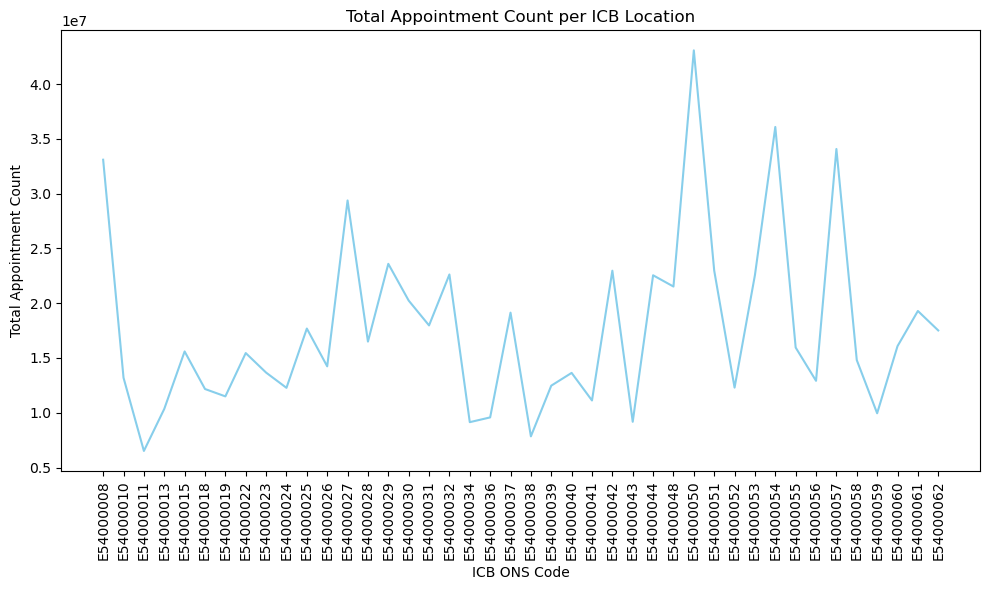

In [23]:
#### Monthly appointments in ar Dataframe per ICB.
# Group by 'icb_ons_code' and sum the 'ar_count_of_appointments'.
appointments_per_icb = ar.groupby('icb_ons_code')['ar_count_of_appointments'].sum().reset_index()

# Create the bar plot.
plt.figure(figsize=(10, 6))
sns.lineplot(x='icb_ons_code', y='ar_count_of_appointments', data=appointments_per_icb, color='skyblue')

# Set the title and labels.
plt.title('Total Appointment Count per ICB Location')
plt.xlabel('ICB ONS Code')
plt.ylabel('Total Appointment Count')

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Display the plot.
plt.tight_layout()
plt.show()



## Seasonality trend of appointments in 'ar' (covers longest period inc.Covid)

**Observation** After the unusual dip in appointments at the start of pandemic, the rest of data have a clear trend of where autumn months (Sep-Oct-Nov) tend to have higher number of appointments, it decreases in winter, goes back up in March and later in June.

The trend is repeated across all ICBs

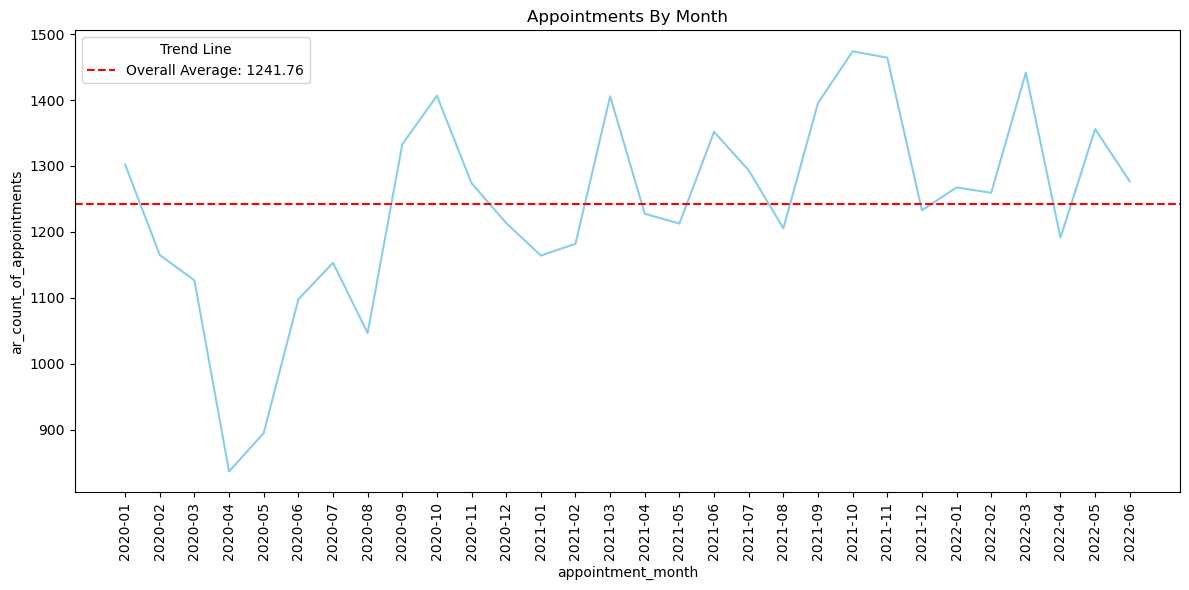

In [25]:
# Set the figure size.
plt.figure(figsize=(12, 6))

# Create a line plot for the count of appointments by month.
sns.lineplot(data=ar, x='appointment_month', y='ar_count_of_appointments', 
             color='skyblue', errorbar=None)

# Calculate the average monthly appointments by calling function.
average_appointments = average_monthly_appointments(ar, 'appointment_month', 
                                                    'ar_count_of_appointments')

# Calculate the overall average (mean) of the monthly averages.
overall_average = average_appointments.mean()

# Plot the overall average line.
plt.axhline(y=overall_average, color='red', linestyle='--', 
            label=f'Overall Average: {overall_average:.2f}')

# Set plot title.
plt.title("Appointments By Month")

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Add a legend to the plot.
plt.legend(title='Trend Line')

# Show the plot.
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

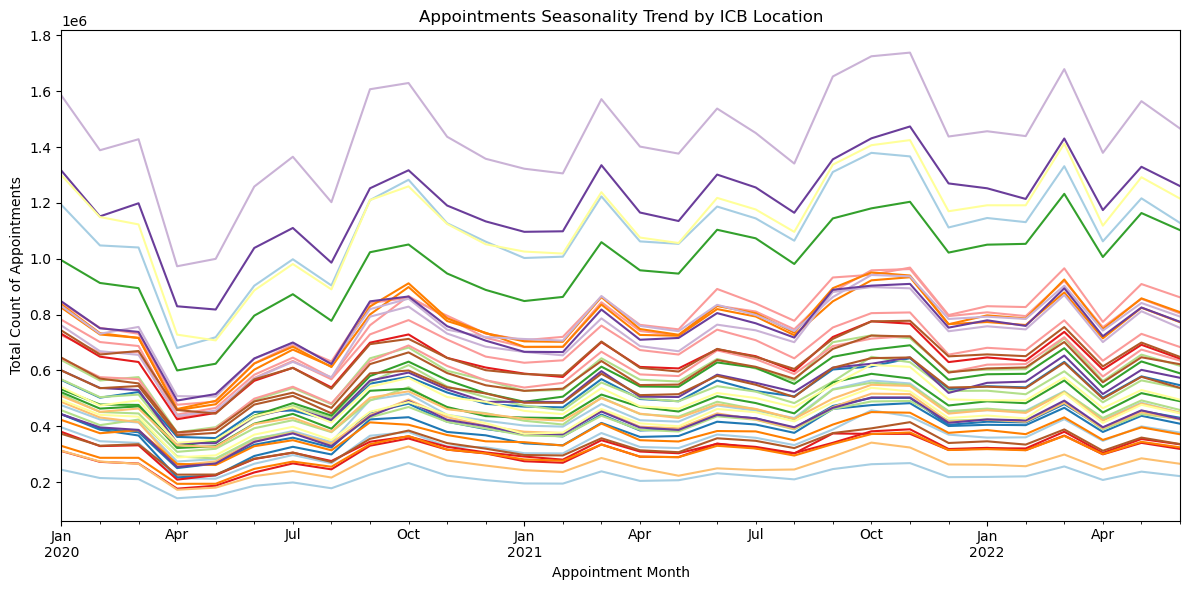

In [26]:
# Group by both 'appointment_month_datetime' and 'icb_ons_code' 
# and calculate the sum of 'ar_count_of_appointments'.
appointments_by_location_and_month = ar.groupby(
    ['appointment_month_datetime','icb_ons_code'])['ar_count_of_appointments'].sum().reset_index()

# Pivot the table to get 'icb_ons_code' as columns and 'appointment_month_datetime' as rows.
appointments_pivot = appointments_by_location_and_month.pivot(index='appointment_month_datetime', 
                                                              columns='icb_ons_code', 
                                                              values='ar_count_of_appointments')
# Plot the chart
plt.figure(figsize=(12, 6))

appointments_pivot.plot(kind='line', figsize=(12, 6), colormap='Paired', legend=False)

# Add labels and title
plt.xlabel('Appointment Month')
plt.ylabel('Total Count of Appointments')
plt.title('Appointments Seasonality Trend by ICB Location')

# Rotate x-axis labels 
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



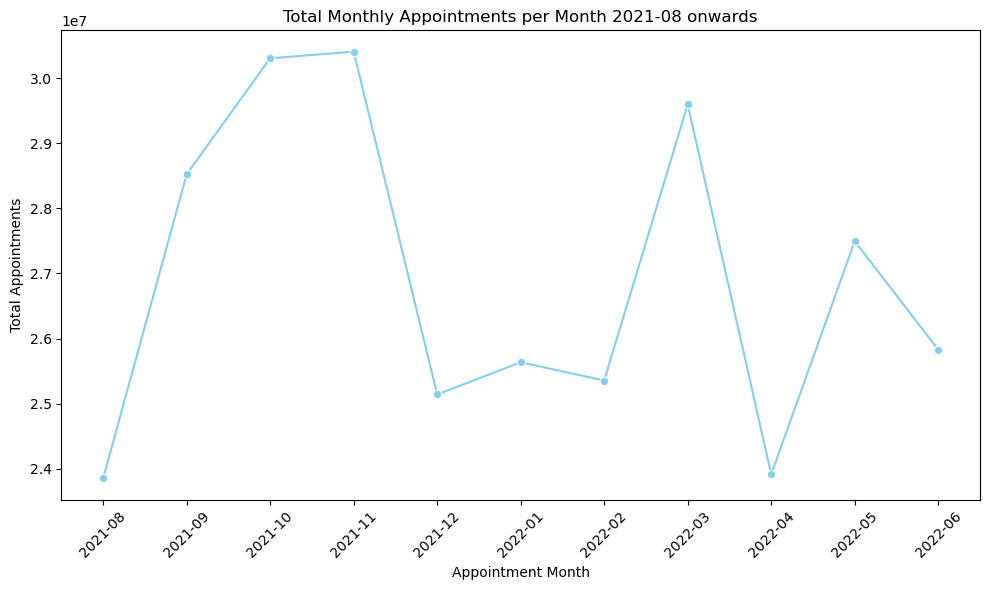

In [27]:
# Check appointments' seasonality trend in time adjusted data frame filtered_ar 2021-08 onwards.
# Change 'appointment_month' to string type
filtered_ar['appointment_month'] = filtered_ar['appointment_month'].astype(str)

filtered_ar_months = filtered_ar.groupby(
    'appointment_month')['ar_count_of_appointments'].sum().reset_index()

# Plot the total monthly appointments 2021-08 onwards
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='ar_count_of_appointments', 
             data=filtered_ar_months, marker='o', color='skyblue',errorbar=None)
plt.title('Total Monthly Appointments per Month 2021-08 onwards')
plt.xlabel('Appointment Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Count of Average Monthly Appointments between 2021-12 and 2022-06

**Observation** ‘ad’ dataset must have been aggregated to only display attended appointments. 

In [29]:
# Apply 'overall_average_of_appointments'function to calculate overall average appointments for each DataFrame 
#but only for the common period between '2021-12' and '2022-06'.

# Filter the DataFrame to include only period between '2021-12' and '2022-06'and apply the function to the filtered DataFrame
# ad DataFrame.
filtered_ad = ad[(
    ad['appointment_month'] >= '2021-12') & (
        ad['appointment_month'] <= '2022-06')]
overall_average_of_appointments_ad = overall_average_of_appointments(
    filtered_ad, 'appointment_month', 'ad_count_of_appointments'
)
print(f"Overall Average Appointments ad between 2021-12 and 2022-06: {overall_average_of_appointments_ad:,.2f}")

# ar DataFrame.
ar_filtered = ar[(
    ar['appointment_month'] >= '2021-12') & (
        ar['appointment_month'] <= '2022-06')]
overall_average_of_appointments_ar = overall_average_of_appointments(
    ar_filtered, 'appointment_month', 'ar_count_of_appointments'
)
print(f"Overall Average Appointments ar between 2021-12 and 2022-06: {overall_average_of_appointments_ar:,.2f}")

# nc DataFrame.
filtered_nc = nc[(nc['appointment_month'] >= '2021-12') & (
    nc['appointment_month'] <= '2022-06')]
overall_average_of_appointments_nc = overall_average_of_appointments(
    filtered_nc, 'appointment_month', 'nc_count_of_appointments')
print(f"Overall Average Appointments nc between 2021-12 and 2022-06: {overall_average_of_appointments_nc:,.2f}")

Overall Average Appointments ad between 2021-12 and 2022-06: 23,997,241.71
Overall Average Appointments ar between 2021-12 and 2022-06: 26,137,599.14
Overall Average Appointments nc between 2021-12 and 2022-06: 26,137,599.14


## Appointment Status
**Observation:** 91% of appointments attended. The proportion of DNA is very small.

In [31]:
# Group by 'appointment_status' and calculate the sum of appointments for each status.
appointments_by_status = ar.groupby(
    'appointment_status')['ar_count_of_appointments'].sum().reset_index()

# Calculate the total appointments per status divided by the total number of months in the filtered period.
appointments_by_status_monthly = appointments_by_status['ar_count_of_appointments']/ ar['appointment_month'].nunique()

# Adding the average monthly appointments to the DataFrame.
appointments_by_status['average_monthly_appointments'] = appointments_by_status_monthly

# Calculate the total of all average monthly appointments.
total_average_monthly_appointments = appointments_by_status['average_monthly_appointments'].sum()

# Calculate the proportion of each status to the total sum of average monthly appointments.
appointments_by_status['proportion'] = appointments_by_status['average_monthly_appointments'] / total_average_monthly_appointments

# Print the average monthly appointments by appointment status.
print("\nAverage Monthly Appointments by Appointment Status:")
for _, row in appointments_by_status.iterrows():
    print(f"{row['appointment_status']}: {row['average_monthly_appointments']:,.2f}")

# Print the proportions of average monthly appointments by appointment status in percentage.
print("\nProportions of Average Monthly Appointments by Appointment Status (%):")
for _, row in appointments_by_status.iterrows():
    print(f"{row['appointment_status']}: {row['proportion'] * 100:,.0f}%")



Average Monthly Appointments by Appointment Status:
Attended: 22,591,862.53
DNA: 1,030,374.43
Unknown: 1,137,913.87

Proportions of Average Monthly Appointments by Appointment Status (%):
Attended: 91%
DNA: 4%
Unknown: 5%


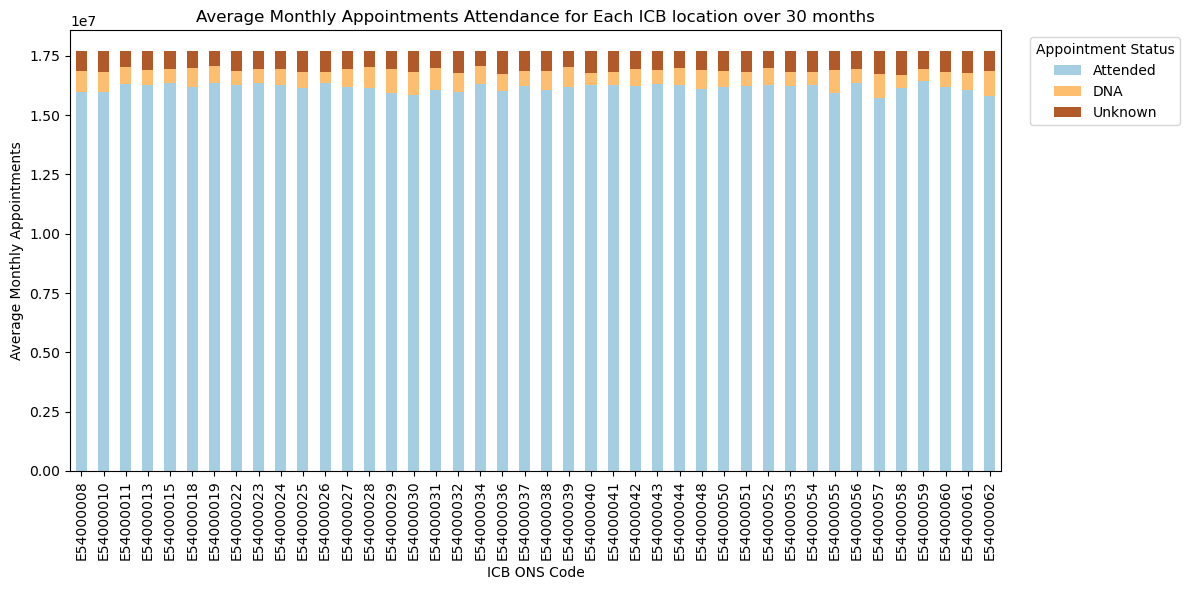

In [32]:
# Plot for Average Monthly Appointments by attendance for Each ICB location.
# Group by 'icb_ons_code' and 'appointment_status' to get total appointments for 
# each status within each icb_ons_code.
appointments_by_status_and_icb = ar.groupby(
    ['icb_ons_code', 'appointment_status'])['ar_count_of_appointments'].sum().unstack(fill_value=0)

# Calculate the average monthly appointments for each icb_ons_code by 
# summing the appointments and dividing by the number of months.
average_monthly_appointments_icb = appointments_by_status_and_icb.mean(axis=0)

# Normalize the data by dividing each icb_ons_code's appointment counts by 
# the total appointments in that icb_ons_code.
normalized_appointments_icb = appointments_by_status_and_icb.div(
    appointments_by_status_and_icb.sum(axis=1), axis=0) * average_monthly_appointments_icb.sum()

# Plot the stacked bar chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Create a stacked bar plot for each icb_ons_code.
normalized_appointments_icb.plot(kind='bar', stacked=True, ax=ax, colormap='Paired')

# Add labels and title.
ax.set_xlabel('ICB ONS Code')
ax.set_ylabel('Average Monthly Appointments')
ax.set_title('Average Monthly Appointments Attendance for Each ICB location over 30 months')

# Move the legend to the top right.
ax.legend(title='Appointment Status', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot with rotated x-axis labels.
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


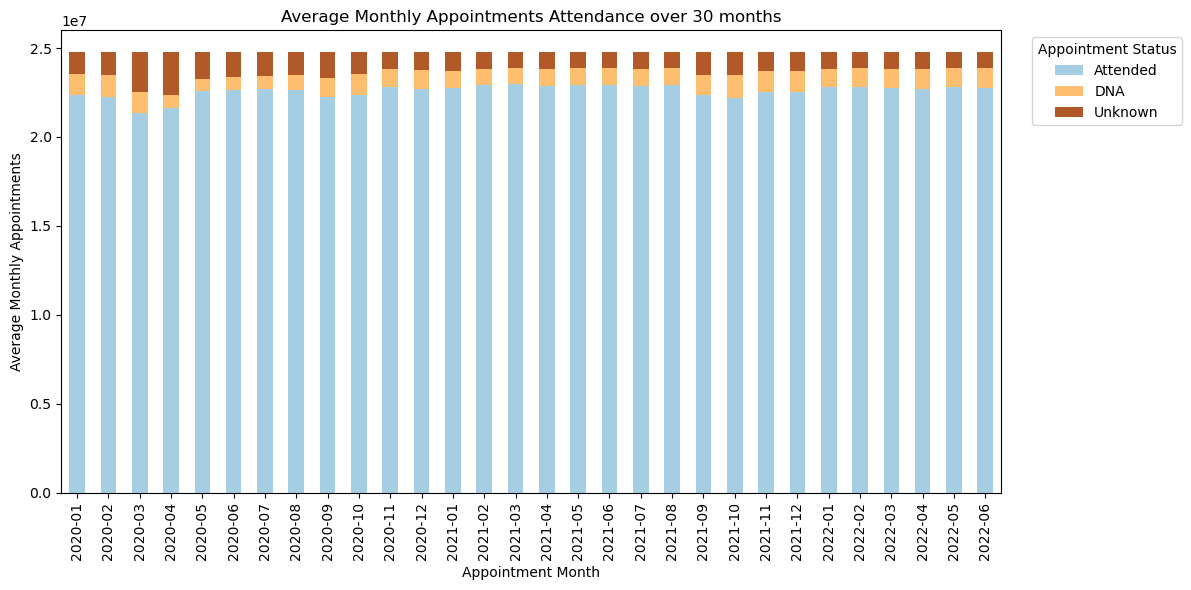

In [33]:
#### Average Monthly Appointments by Appointment Status.
# Group by 'appointment_month' and 'appointment_status' to get total appointments 
# for each status within each month.
appointments_by_status_and_month = ar.groupby(
    ['appointment_month', 'appointment_status'])['ar_count_of_appointments'].sum().unstack(fill_value=0)

# Calculate the average monthly appointments by 
#summing the total appointments per month and dividing by the number of months.
average_monthly_appointments = appointments_by_status_and_month.mean(axis=0)

# Normalize the data by dividing each month's appointment counts by 
# the total appointments in that month.
normalized_appointments = appointments_by_status_and_month.div(
    appointments_by_status_and_month.sum(axis=1), axis=0) * average_monthly_appointments.sum()

# Plot the stacked bar chart.
fig, ax = plt.subplots(figsize=(12, 6))

# Create a stacked bar plot for each appointment_month.
normalized_appointments.plot(kind='bar', stacked=True, ax=ax, colormap='Paired')

# Add labels and title.
ax.set_xlabel('Appointment Month')
ax.set_ylabel('Average Monthly Appointments')
ax.set_title('Average Monthly Appointments Attendance over 30 months')

# Move the legend to the top right
ax.legend(title='Appointment Status', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot with rotated x-axis labels.
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


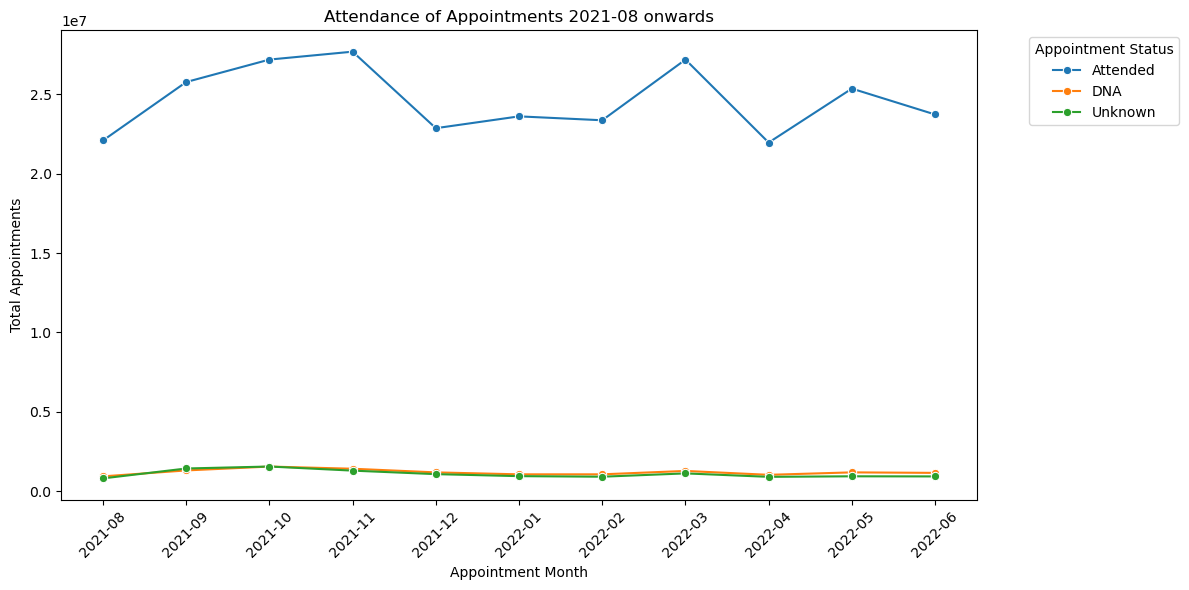

In [34]:
# Appointment status split over time 2021-08 onwards.
# Group by month and 'appointment_status' and calculate the sum of 'ar_count_of_appointments'.
appt_by_status_monthly = filtered_ar.groupby(
    ['appointment_month','appointment_status'])['ar_count_of_appointments'].sum().reset_index()

# Create the lineplot.
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='ar_count_of_appointments',
    hue='appointment_status',
    data=appt_by_status_monthly,
    marker='o'
)

# Set the title and labels.
plt.title('Attendance of Appointments 2021-08 onwards')
plt.xlabel('Appointment Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)

# Move the legend outside of the plot.
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot.
plt.tight_layout()
plt.show()

## Health Professional Type
**Observation:** impossible to apportion work-load within 'Other Practice staff'. Almost half of all appointments within practices on average are carried out by GP

During the autumn peak period Other Practice Staff handle more appointments than GP. 

Also, during autumn peaks 'Unknown'category (recorded as Service Setting in metadata.txt) has spikes and is increasing gradually over the years

In [36]:
# Determine the number of hcp type.
print(ar['hcp_type'].unique())

['GP' 'Other Practice staff' 'Unknown']



Average Monthly Appointments by Health Professional:
GP: 12,655,005
Other Practice staff: 11,321,684
Unknown: 783,462

Proportions of Average Monthly Appointments by Health Professional (%):
GP: 48%
Other Practice staff: 43%
Unknown: 3%


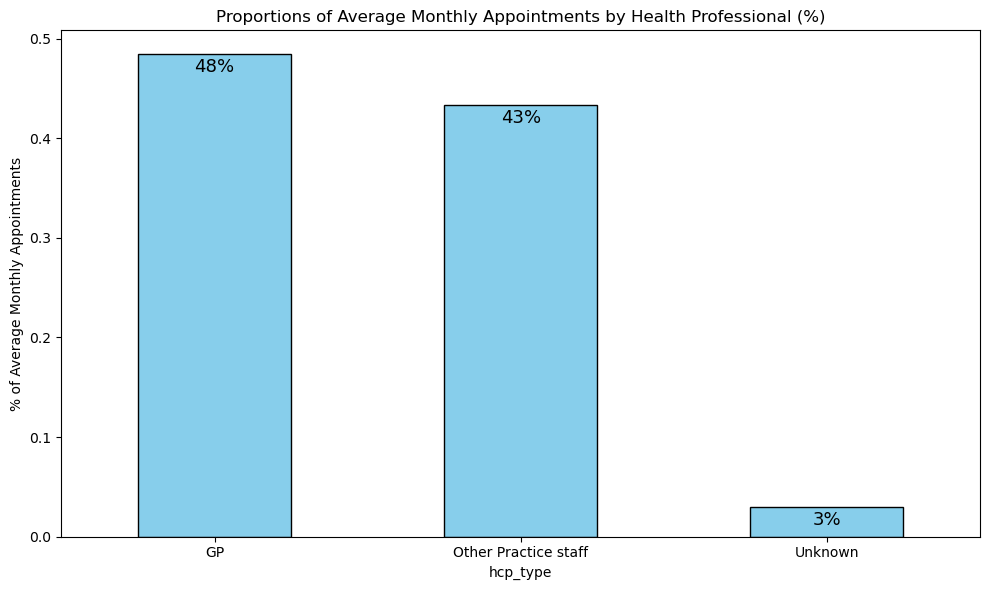

In [37]:
# The average monthly appointments split by 'hcp_type' in 'ar' DataFrame.

# Group by 'hcp_type' and calculate the sum of appointments for each status.
appointments_by_hcp_type = ar.groupby('hcp_type')['ar_count_of_appointments'].sum().reset_index()

# Calculate average monthly appointments per 'hcp_type'.
appointments_by_hcp_type_monthly = (
    appointments_by_hcp_type['ar_count_of_appointments'] / 
    ar['appointment_month'].nunique()
)
appointments_by_hcp_type['average_monthly_appointments'] = appointments_by_hcp_type_monthly

print("\nAverage Monthly Appointments by Health Professional:")
for _, row in appointments_by_hcp_type.iterrows():
    print(f"{row['hcp_type']}: {row['average_monthly_appointments']:,.0f}")

# Calculate the proportion of each 'hcp_type' to the total average monthly appointments.
hcp_type_proportions = appointments_by_hcp_type_monthly / overall_average_of_appointments_ar
appointments_by_hcp_type['proportion'] = hcp_type_proportions

print("\nProportions of Average Monthly Appointments by Health Professional (%):")
for _, row in appointments_by_hcp_type.iterrows():
    print(f"{row['hcp_type']}: {row['proportion'] * 100:,.0f}%")

# Plotting the standard bar chart.
fig, ax = plt.subplots(figsize=(10, 6))

appointments_by_hcp_type.set_index(
    'hcp_type')['proportion'].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Add the percentage labels to each bar.
for i, value in enumerate(appointments_by_hcp_type['proportion']):
    ax.text(i, value - 0.022, f'{value * 100:,.0f}%', ha='center', va='bottom', fontsize=13)

# Adding labels and title.
ax.set_ylabel('% of Average Monthly Appointments')
ax.set_title('Proportions of Average Monthly Appointments by Health Professional (%)')

# Display the plot.
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

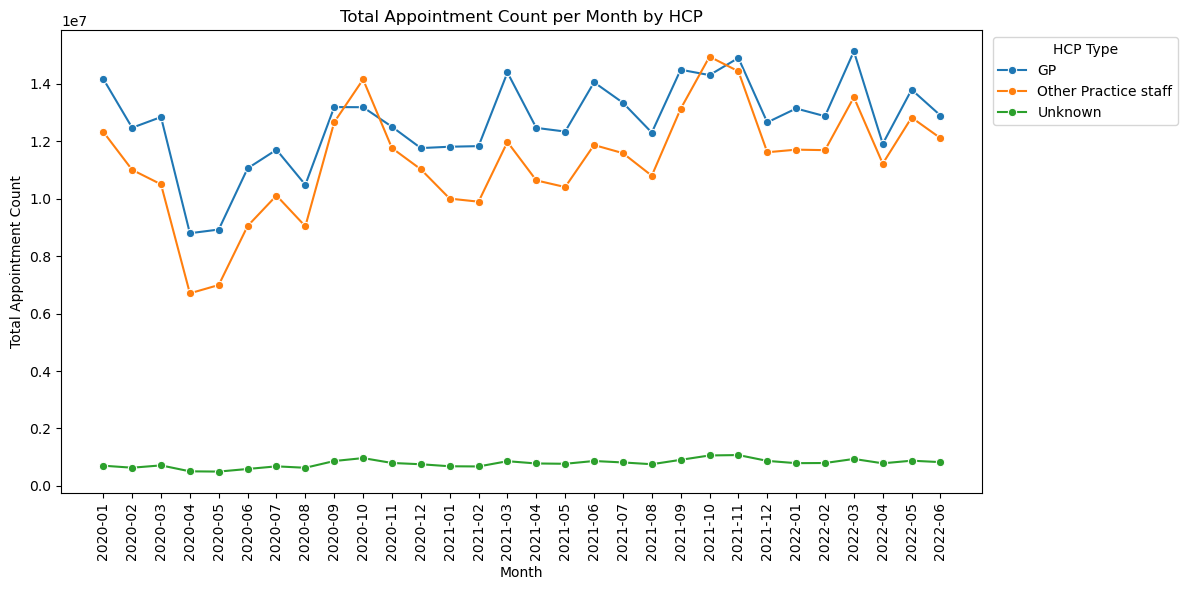

In [38]:
# Appointments count by healhcare professional.
# Group by 'appointment_month' and 'hcp_type' and sum the 'ar_count_of_appointments'.
appointments_per_month_hcp = (
    ar.groupby(['appointment_month', 'hcp_type'])
    ['ar_count_of_appointments'].sum().reset_index()
)

# Create the line plot.
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='ar_count_of_appointments', 
    hue='hcp_type', 
    data=appointments_per_month_hcp, 
    marker='o'
)

# Set the title and labels.
plt.title('Total Appointment Count per Month by HCP')
plt.xlabel('Month')
plt.ylabel('Total Appointment Count')

# Move the legend to the top right.
plt.legend(title='HCP Type', loc='upper right', bbox_to_anchor=(1.22, 1))

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


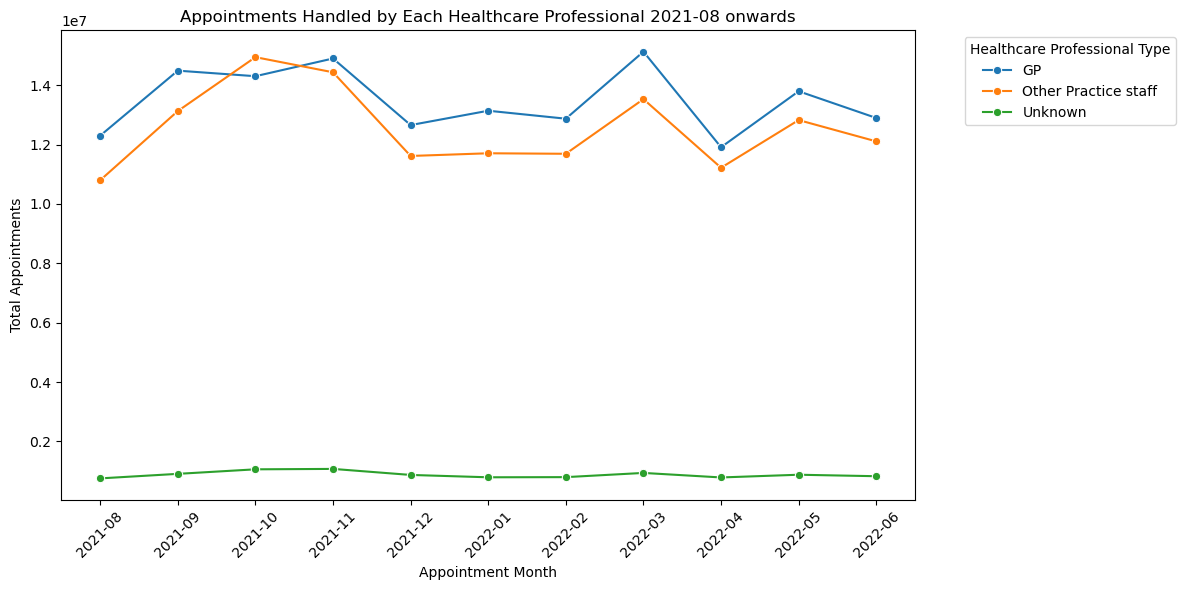

In [39]:
# Group by month and 'hcp_type' and calculate the sum of 'ar_count_of_appointments'.
appt_by_hcp_monthly = filtered_ar.groupby(
    ['appointment_month','hcp_type'])['ar_count_of_appointments'].sum().reset_index()

# Create the lineplot.
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='ar_count_of_appointments', 
    hue='hcp_type', 
    data=appt_by_hcp_monthly, 
    marker='o'
)

# Set the title and labels.
plt.title('Appointments Handled by Each Healthcare Professional 2021-08 onwards')
plt.xlabel('Appointment Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)

# Move the legend outside of the plot.
plt.legend(
    title='Healthcare Professional Type', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

# Display the plot.
plt.tight_layout()
plt.show()

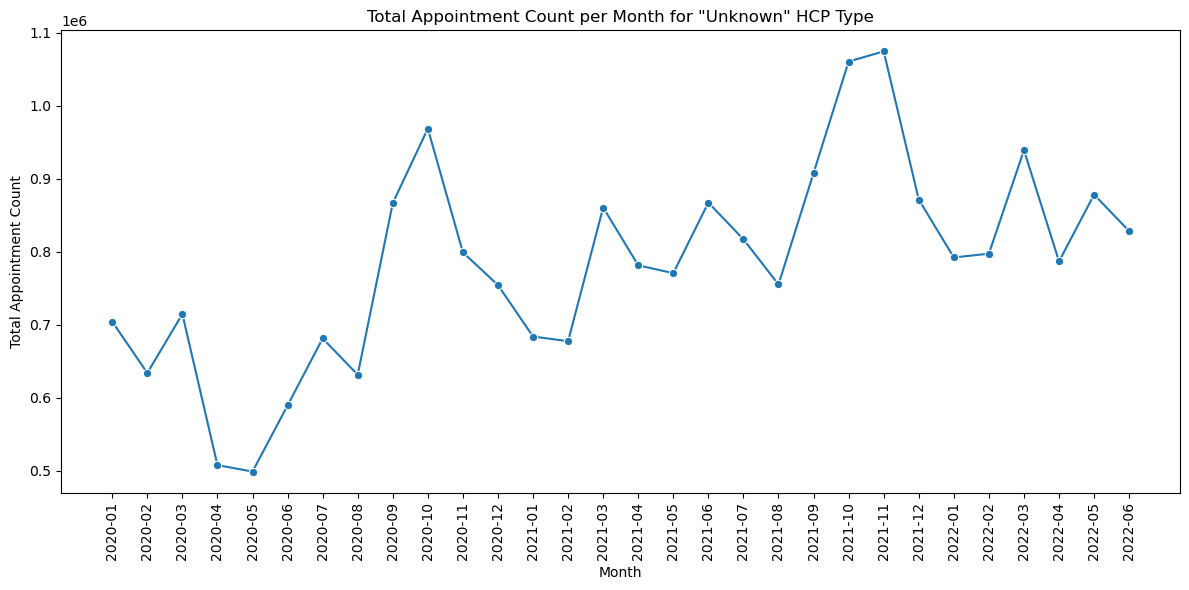

In [40]:
# Dinamics of 'Unknown' category within hcp_type.
# Filter the DataFrame to only include 'Unknown' hcp_type.
appointments_per_month_hcp_unknown = appointments_per_month_hcp[appointments_per_month_hcp['hcp_type'] == 'Unknown']

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='ar_count_of_appointments', 
    hue='hcp_type', 
    data=appointments_per_month_hcp_unknown, 
    marker='o'
)

# Set the title and labels.
plt.title('Total Appointment Count per Month for "Unknown" HCP Type')
plt.xlabel('Month')
plt.ylabel('Total Appointment Count')

# No legend.
plt.legend([],[], frameon=False)

# Rotate x-axis labels.
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


## Appointment Mode
**Observation:** 56% of appointments happen face-to-face and 34% by telephone, the rest of categories very small. 
Both GPs and Other Practice Staff carry out FtF and Telephone appointments in similar proportions

In [42]:
# Determine the number of hcp type.
print(ar['appointment_mode'].unique())

['Face-to-Face' 'Home Visit' 'Telephone' 'Unknown' 'Video/Online']


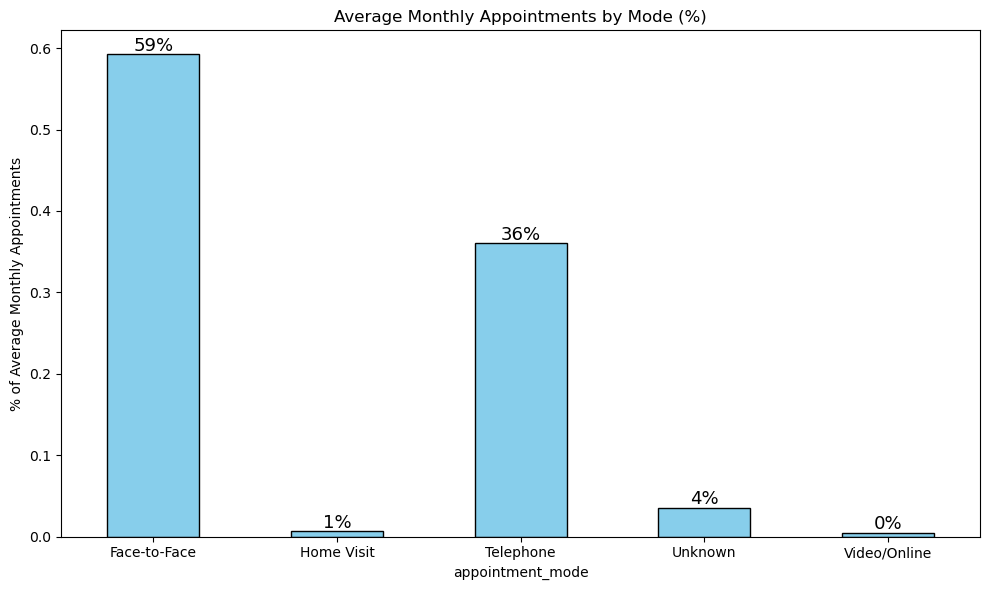

In [43]:
# The average monthly appointments split by 'appointment_mode' in 'ar' DataFrame.

# Group by 'appointment_mode' and calculate the sum of appointments for each mode.
appointments_by_mode = ar.groupby('appointment_mode')['ar_count_of_appointments'].sum().reset_index()

# Calculate average monthly appointments per 'appointment_mode'.
appointments_by_mode_monthly = (
    appointments_by_mode['ar_count_of_appointments'] / ar['appointment_month'].nunique()
)
appointments_by_mode['average_monthly_appointments'] = appointments_by_mode_monthly

# Calculate the total sum of average monthly appointments across all modes.
total_average_monthly_appointments = appointments_by_mode['average_monthly_appointments'].sum()

# Calculate the proportion of each 'appointment_mode' to the total average monthly appointments.
appointments_by_mode['proportion'] = (
    appointments_by_mode['average_monthly_appointments'] / total_average_monthly_appointments
)

# Set 'appointment_mode' as index for proper plotting.
appointments_by_mode.set_index('appointment_mode', inplace=True)

# Plot the standard bar chart.
fig, ax = plt.subplots(figsize=(10, 6))

# Use the index (appointment_mode) for the x-axis.
appointments_by_mode['proportion'].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Add the percentage labels to each bar
for i, value in enumerate(appointments_by_mode['proportion']):
    ax.text(i, value - 0.001, f'{value * 100:,.0f}%', ha='center', va='bottom', fontsize=13)

# Adding labels and title
ax.set_ylabel('% of Average Monthly Appointments')
ax.set_title('Average Monthly Appointments by Mode (%)')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print the calculated proportions to verify the sum
#print("\nProportions of Average Monthly Appointments by Mode (%):")
#for _, row in appointments_by_mode.iterrows():
    #print(f"{row.name}: {row['proportion'] * 100:,.2f}%")

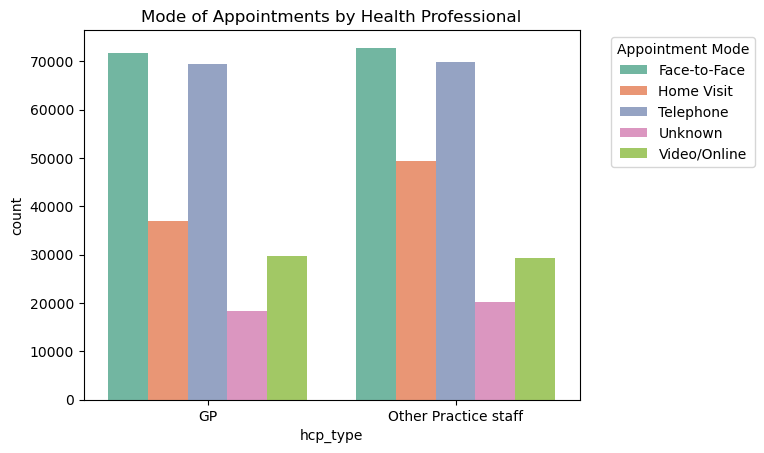

In [44]:
# Create countplot to show mode of appointments by hcp.
sns.countplot(
    x='hcp_type', 
    hue='appointment_mode', 
    data=ar[ar['hcp_type'].isin(['GP', 'Other Practice staff'])], 
    palette='Set2'
)

# Move the legend outside of the plot.
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Mode of Appointments by Health Professional')


# Adjust layout to make room for the legend.
#plt.tight_layout()

# Show the plot
plt.show()

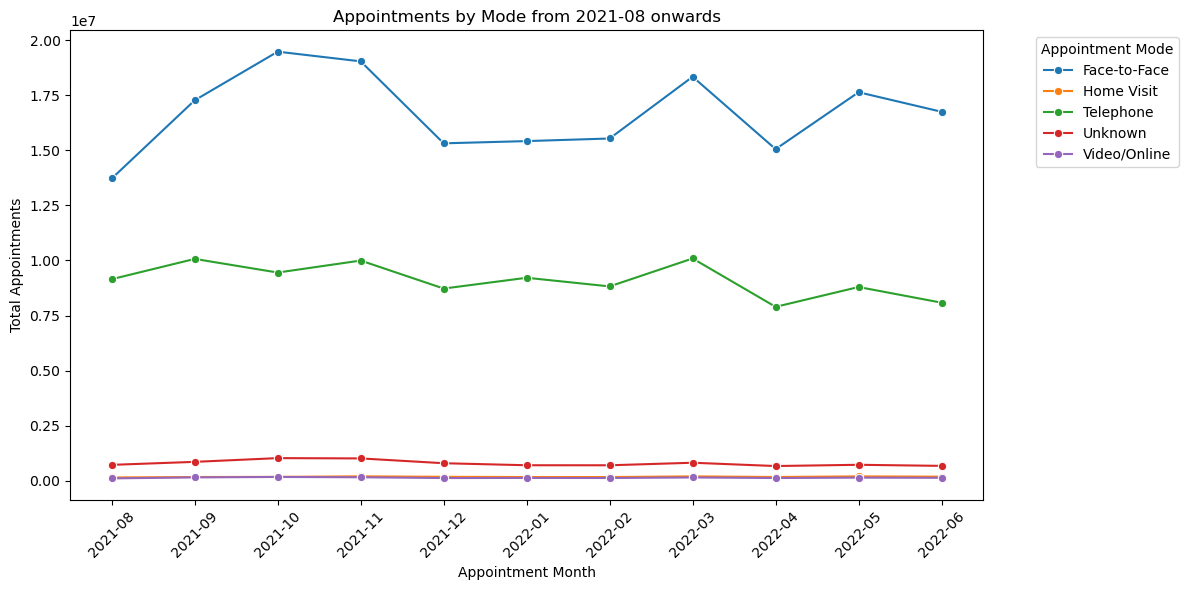

In [45]:
# Create a lineplot to see whether there are changes in terms of appointment type and the busiest months from 2021-08 onwards.
# Group by month and 'appointment_mode' and calculate the sum of 'ar_count_of_appointments'.
appt_by_mode_monthly = (
    filtered_ar.groupby(['appointment_month','appointment_mode'])[
    'ar_count_of_appointments'].sum().reset_index()
)

# Create the lineplot.
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='ar_count_of_appointments', 
    hue='appointment_mode', 
    data=appt_by_mode_monthly, 
    marker='o'
)

# Set the title and labels.
plt.title('Appointments by Mode from 2021-08 onwards')
plt.xlabel('Appointment Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)

# Move the legend outside of the plot.
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot.
plt.tight_layout()
plt.show()

**Observation** Face-to-Face appts increase sharply while Telephone appts slightly dip in October confirming the increase of Planned Clinical procedures and Clinics in autumn. 
Telephone appts again go up slightly when those Clinical Procedures are over. Face-to Face appt decrece accordingly. 
March peak is mostly General Routine/ Accute appt hence FtF and Telephone appointments increase is similar in trend.

## Wait Time for Appointments
**Observations** 46% appointments happen on the same day, 9% next day, 21% within a week, 12% waited 8-14 days.

GPs and Other Practice Staff carry out in equal quantities appointments for the same day, next day and the same week, however if patients had to wait for the appointment longer it was more likely carried out by other practice staff.

During the autumn peak, same-day and next-day appointments decrease, while appointments with wait times of 2-7, 8-14, and 15-21 days increase, likely due to resources being redirected elsewhere (e.g. Planned Clinical Procedures/Clinics). Appointments with shorter wait times return to pre-peak levels by December, while those with longer wait times recover by January. The quicker recovery of shorter wait time appointments may suggests a shortage of "Other Staff" rather than GPs.


Average Monthly Appointments by Wait Time:
1 Day: 2,257,203
15  to 21 Days: 1,423,686
2 to 7 Days: 5,126,484
22  to 28 Days: 851,218
8  to 14 Days: 2,894,884
More than 28 Days: 768,366
Same Day: 11,424,906
Unknown / Data Quality: 13,404

Proportions of Average Monthly Appointments by Wait Time (%):
1 Day: 9%
15  to 21 Days: 6%
2 to 7 Days: 21%
22  to 28 Days: 3%
8  to 14 Days: 12%
More than 28 Days: 3%
Same Day: 46%
Unknown / Data Quality: 0%


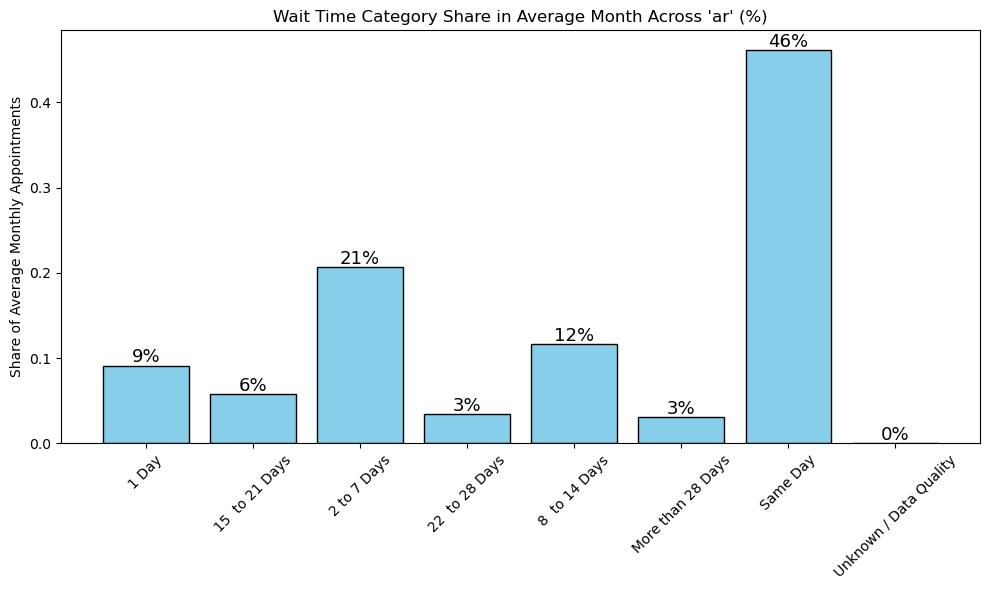

In [48]:
# The average monthly appointments split by 'time_between_book_and_appointment' in 'ar' DataFrame.

# Group by 'time_between_book_and_appointment' and calculate the sum of appointments for each category.
appointments_by_wait = (
    ar.groupby('time_between_book_and_appointment')
    ['ar_count_of_appointments']
    .sum().
    reset_index()
)

# Calculate average monthly appointments per 'time_between_book_and_appointment'.
appointments_by_wait['monthly_avg'] = (
    appointments_by_wait['ar_count_of_appointments'] / ar['appointment_month'].nunique())
print("\nAverage Monthly Appointments by Wait Time:")
for status, value in zip(
    appointments_by_wait['time_between_book_and_appointment'], 
    appointments_by_wait['monthly_avg']):
    print(f"{status}: {value:,.0f}")

# Calculate the total sum of average monthly appointments across all categories.
total_average_monthly_appointments = appointments_by_wait['monthly_avg'].sum()

# Calculate the proportion of each 'time_between_book_and_appointment' 
#to the total average monthly appointments.
wait_proportions = appointments_by_wait['monthly_avg'] / total_average_monthly_appointments
# Print the proportions as percentages.
print("\nProportions of Average Monthly Appointments by Wait Time (%):")
for wait, value in zip(
    appointments_by_wait['time_between_book_and_appointment'], 
    wait_proportions):
    print(f"{wait}: {value * 100:,.0f}%")

# Plot the standard bar chart.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot using the correct 'time_between_book_and_appointment' values as the x-axis.
ax.bar(
    appointments_by_wait['time_between_book_and_appointment'], 
    wait_proportions, 
    color='skyblue', 
    edgecolor='black'
)

# Add percentage labels on each bar.
for i, value in enumerate(wait_proportions):
    ax.text(appointments_by_wait['time_between_book_and_appointment'].iloc[i], 
            value - 0.001, 
            f'{value * 100:,.0f}%', 
            ha='center', 
            va='bottom', 
            fontsize=13
           )

# Adding labels and title.
ax.set_ylabel('Share of Average Monthly Appointments')
ax.set_title("Wait Time Category Share in Average Month Across 'ar' (%)")

# Rotate x-axis.
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


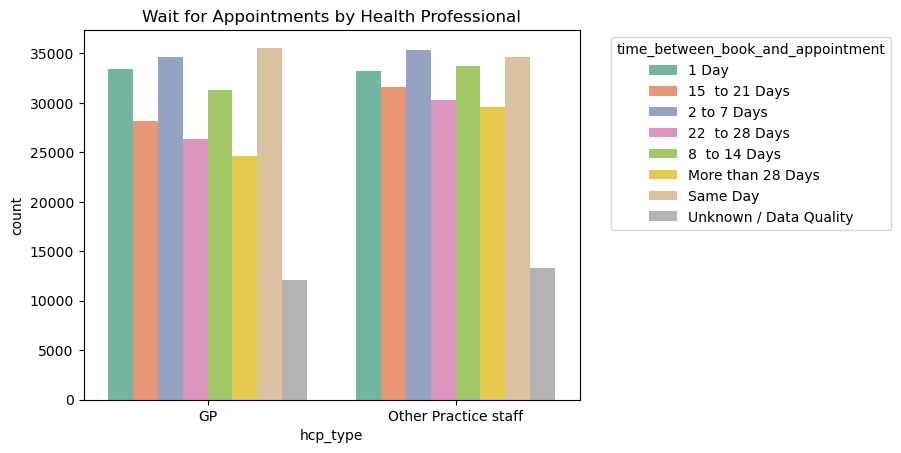

In [49]:
# Create countplot to show how long to wait for the apointment by hcp with only relevant hcp.
sns.countplot(
    x='hcp_type', 
    hue='time_between_book_and_appointment',
    data=ar[ar['hcp_type'].isin(['GP', 'Other Practice staff'])], 
    palette='Set2', order=['GP', 'Other Practice staff']
)

# Move the legend outside of the plot.
plt.legend(
    title='time_between_book_and_appointment', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)
plt.title('Wait for Appointments by Health Professional')

# Adjust layout to make room for the legend
#plt.tight_layout()

# Show the plot
plt.show()

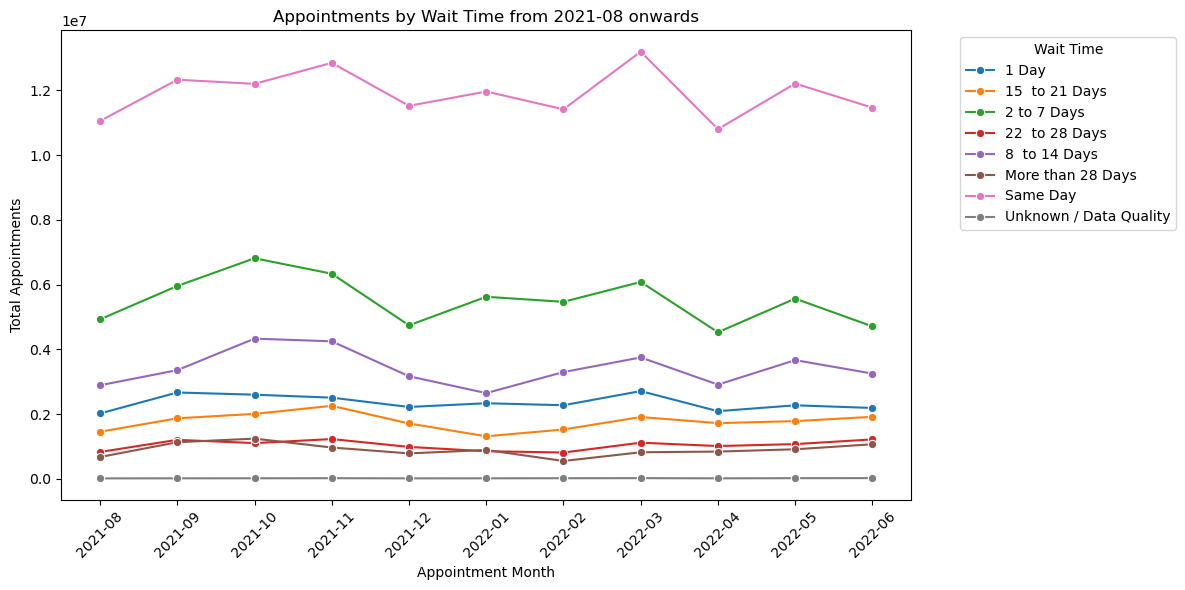

In [50]:
# Create a lineplot to see whether there are any trends in wait time from 2021-08.
# Group by month and 'time_between_book_and_appointment' and calculate the sum of 'ar_count_of_appointments'
appt_by_wait_time_monthly = (
    filtered_ar.groupby(['appointment_month','time_between_book_and_appointment'])
    ['ar_count_of_appointments'].sum().reset_index()
)
# Create the lineplot.
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='ar_count_of_appointments', 
    hue='time_between_book_and_appointment', 
    data=appt_by_wait_time_monthly, 
    marker='o'
)

# Set the title and labels.
plt.title('Appointments by Wait Time from 2021-08 onwards')
plt.xlabel('Appointment Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)

# Move the legend outside of the plot
plt.legend(title='Wait Time', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

**Observation** During the autumn peak, same-day and next-day appointments decrease, while appointments with wait times of 2-7, 8-14, and 15-21 days increase, likely due to resources being redirected elsewhere (e.g. Planned Clinical Procedures/Clinics). Appointments with shorter wait times return to pre-peak levels by December, while those with longer wait times recover by January. The quicker recovery of shorter wait time appointments may suggests a shortage of "Other Staff" rather than GPs. 

March peak seems to be replicated across all wait time categories in uniform trend.

## Appointment wait time up_to_a_week and more_than_a_week
**Observations** Other Practice staff handle more wait_time_more_than_a_week category appts than GPs

Appointments with longer wait times have consistently outpaced those with shorter waits, with their proportion gradually increasing.


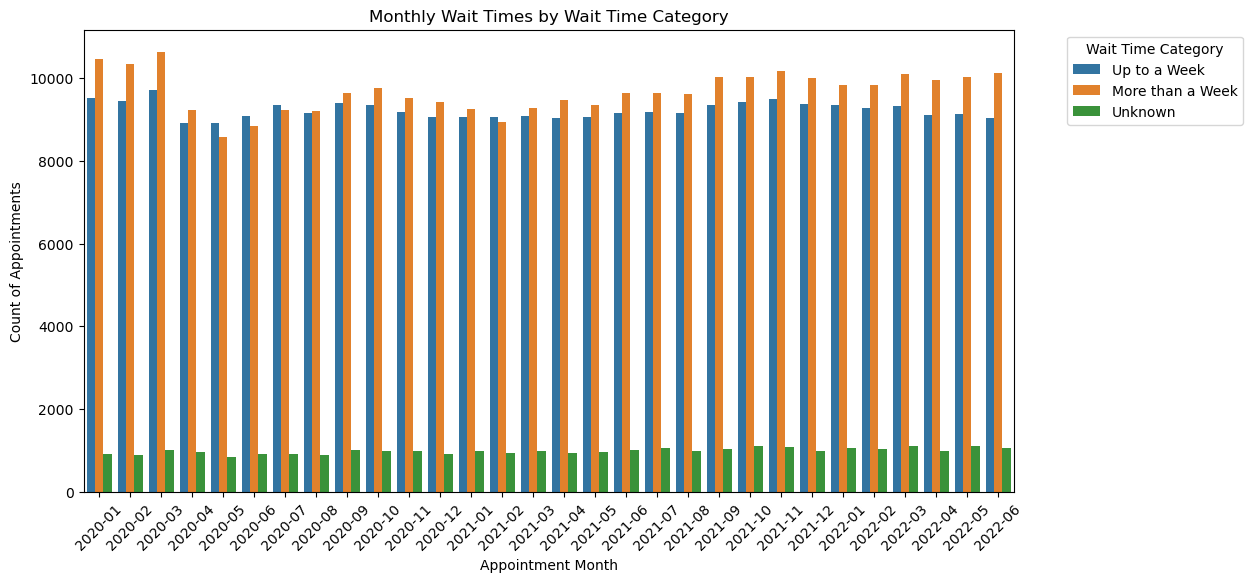

In [53]:
# Create plot to check whether some months have more of longer wait time then others.
# Group values for 'wait_time_up_to_a_week' and 'wait_time_more_than_a_week'.
wait_time_up_to_a_week = (
    ar[ar['time_between_book_and_appointment'].isin(['Same Day', '1 Day', '2 to 7 Days'])]
)
wait_time_more_than_a_week = (
    ar[ar['time_between_book_and_appointment'].isin(
        ['8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days'])]
)
ar['wait_time_category'] = ar['time_between_book_and_appointment'].apply(
    lambda x: 'Up to a Week' if x in ['Same Day', '1 Day', '2 to 7 Days'] 
    else (
        'More than a Week' 
        if x in ['8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days'] 
        else 'Unknown'
    )
)

# Create the count plot.
plt.figure(figsize=(12, 6))
sns.countplot(
    data=ar, 
    x='appointment_month', 
    hue='wait_time_category'
)

# Move the legend outside of the plot.
plt.legend(title='Wait Time Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.xticks(rotation=45)
plt.title('Monthly Wait Times by Wait Time Category')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.show()

**Observation:**
Except for the early months of the Covid pandemic and January 2021 (a lockdown month), appointments with longer wait times have consistently outpaced those with shorter waits, with their proportion gradually increasing. This may indicate an overall shortage of staff, or a shortage for specific appointment types.

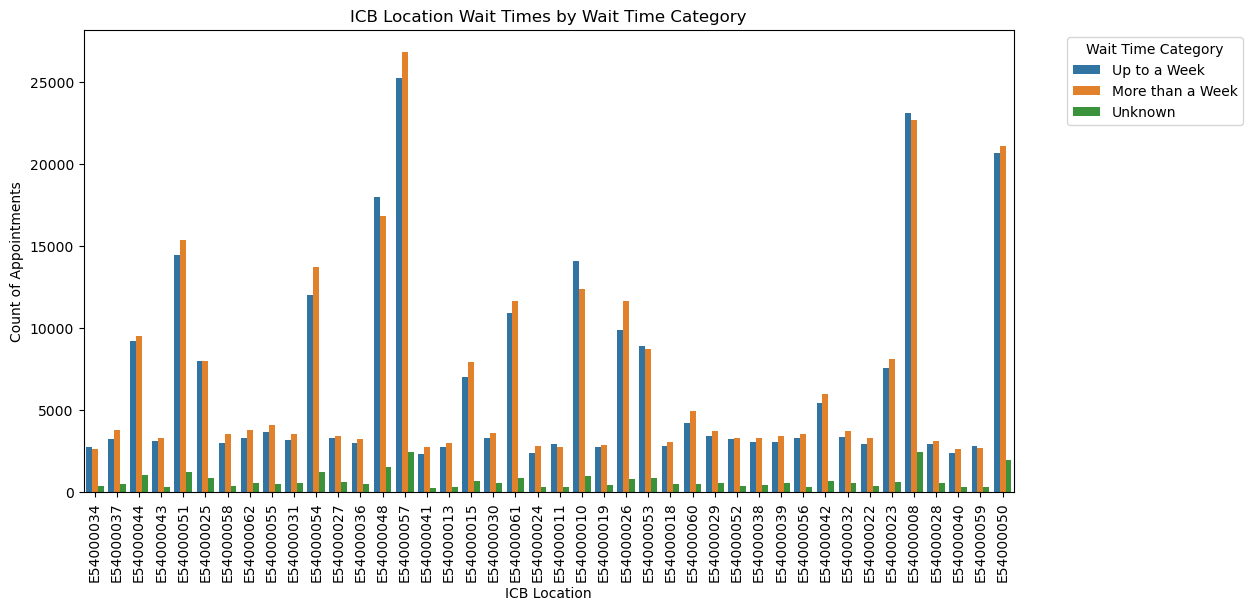

In [55]:
# Create plot to check what's the split between wait times up_to_a_week 
# and more_than_a_week per ICB locations.
# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=ar, x='icb_ons_code', hue='wait_time_category')

# Move the legend outside of the plot.
plt.legend(title='Wait Time Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.xticks(rotation=90)
plt.title('ICB Location Wait Times by Wait Time Category')
plt.xlabel('ICB Location')
plt.ylabel('Count of Appointments')
plt.show()

**Observation:**
Patients on average wait longer for their appointment across majority of ICBs. 

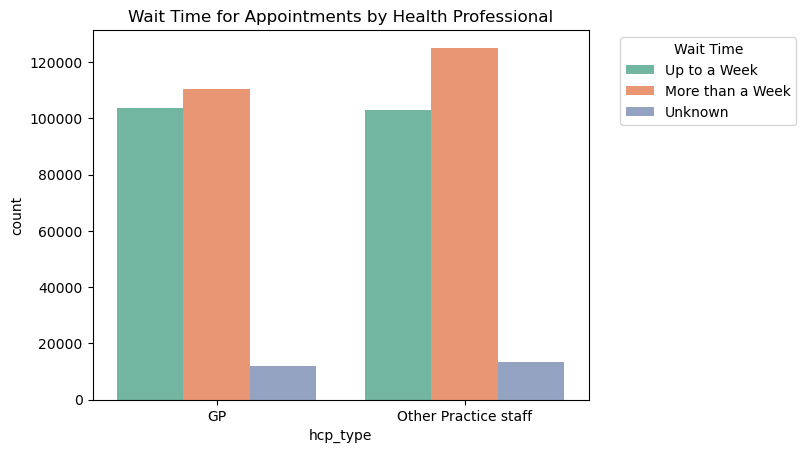

In [57]:
# Create countplot to show split between wait time up_to_a_week and more_than_a_week by hcp. 
#(excl. hcp_type Unknown category = 3% of all). 
sns.countplot(
    x='hcp_type',
    hue= 'wait_time_category',
    data=ar[ar['hcp_type'].isin(['GP', 'Other Practice staff'])],
    palette='Set2', order=['GP', 'Other Practice staff']
)

# Move the legend outside of the plot.
plt.legend(title='Wait Time', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Wait Time for Appointments by Health Professional')


# Adjust layout to make room for the legend.
#plt.tight_layout()

# Show the plot
plt.show()

#### Compare wait time in the busiest & the least busy ICB location.
**Observation:**
The difference is very small whether it is the busiest or the least busy ICB location in terms of appointment wait times.

In [59]:
# Find the busiest and the least busy ICB.
# Sort ICBs by number of appointments.
icb_sorted = ar.groupby('icb_ons_code')['ar_count_of_appointments'].sum().reset_index()

# Sort the data from most to least by 'ar_count_of_appointments'.
icb_sorted = icb_sorted.sort_values(by='ar_count_of_appointments', ascending=False)

# View the sorted DataFrame
print(icb_sorted.head(1))
print(icb_sorted.tail(1))


   icb_ons_code  ar_count_of_appointments
29    E54000050                  43083535
  icb_ons_code  ar_count_of_appointments
2    E54000011                   6513481


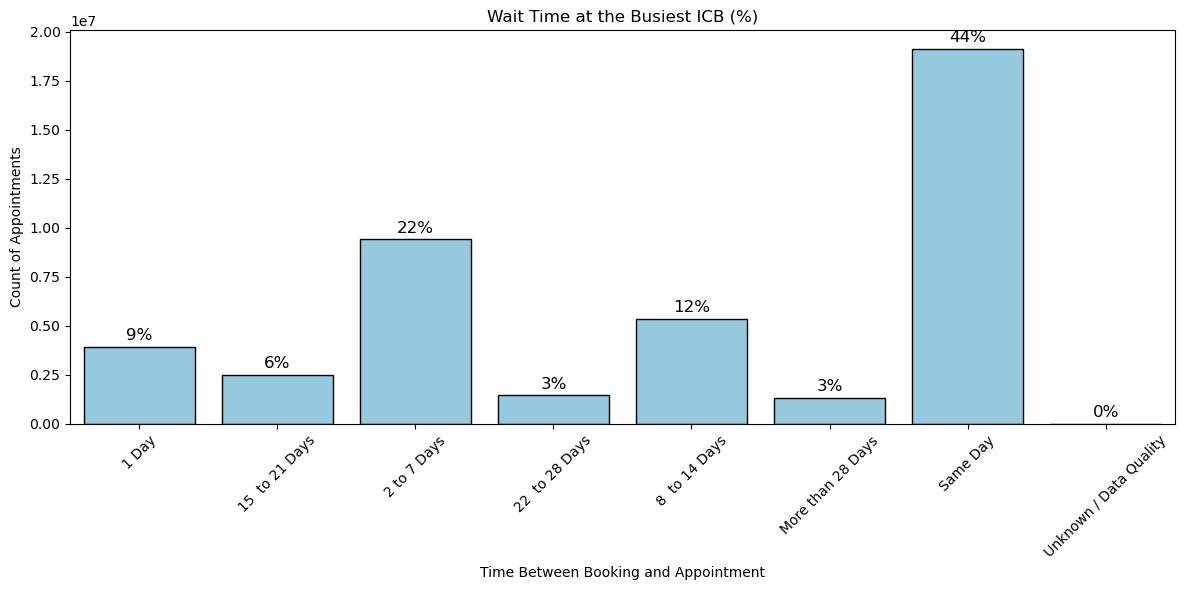

In [60]:
# Filter the DataFrame for 'icb_ons_code' = 'E54000050' (the busiest).
filtered_ar_icbE54000050 = ar[ar['icb_ons_code'] == 'E54000050']
# Group by 'time_between_book_and_appointment' and sum the number of appointments.
appointments_by_wait = (
    filtered_ar_icbE54000050.groupby('time_between_book_and_appointment')
    ['ar_count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate the percentage share of each category.
total_appointments = appointments_by_wait['ar_count_of_appointments'].sum()
appointments_by_wait['percentage'] = (
    (appointments_by_wait['ar_count_of_appointments'] / 
     total_appointments) * 100
)

# Create a bar plot for the count of appointments by 'time_between_book_and_appointment'.
plt.figure(figsize=(12, 6))
sns.barplot(
    x='time_between_book_and_appointment', 
    y='ar_count_of_appointments', 
    data=appointments_by_wait, 
    color='skyblue', 
    edgecolor='black'
)

# Add percentage labels on each bar.
for i, value in enumerate(appointments_by_wait['percentage']):
    plt.text(
        i, 
        appointments_by_wait['ar_count_of_appointments'].iloc[i] + 0.01 * appointments_by_wait['ar_count_of_appointments'].max(), 
        f'{value:.0f}%', 
        ha='center', 
        va='bottom', 
        fontsize=12
    )

# Set plot title and labels.
plt.title("Wait Time at the Busiest ICB (%)")
plt.xlabel("Time Between Booking and Appointment")
plt.ylabel("Count of Appointments")

# Rotate x-axis
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


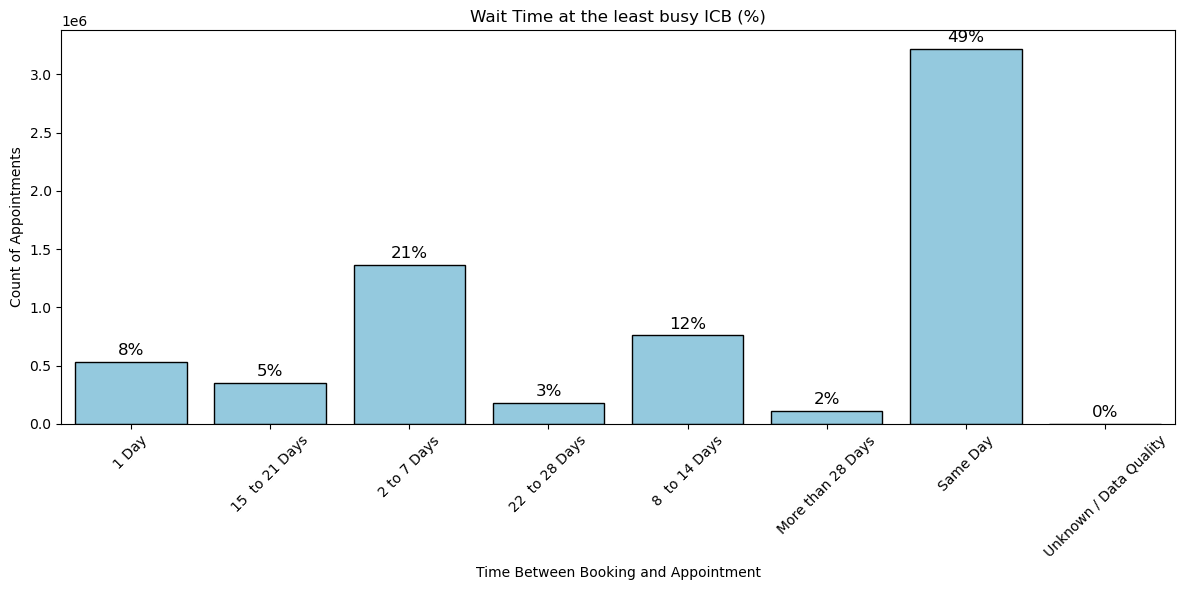

In [61]:
# Filter the DataFrame for 'icb_ons_code' = 'E54000011' (the least busy).
filtered_ar_icbE54000011 = ar[ar['icb_ons_code'] == 'E54000011']

# Group by 'time_between_book_and_appointment' and sum the number of appointments.
appointments_by_wait = (
    filtered_ar_icbE54000011.groupby('time_between_book_and_appointment')
    ['ar_count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate the percentage share of each category.
total_appointments = appointments_by_wait['ar_count_of_appointments'].sum()
appointments_by_wait['percentage'] = (
    (appointments_by_wait['ar_count_of_appointments'] / 
     total_appointments) * 100
)

# Create a bar plot for the count of appointments by 'time_between_book_and_appointment'
plt.figure(figsize=(12, 6))
sns.barplot(
    x='time_between_book_and_appointment', 
    y='ar_count_of_appointments', 
    data=appointments_by_wait, 
    color='skyblue', 
    edgecolor='black'
)

# Add percentage labels on each bar.
for i, value in enumerate(appointments_by_wait['percentage']):
    plt.text(
        i, 
        appointments_by_wait['ar_count_of_appointments'].iloc[i] + 0.01 * appointments_by_wait['ar_count_of_appointments'].max(),
        f'{value:.0f}%', 
        ha='center', 
        va='bottom', 
        fontsize=12
    )
    
# Set plot title and labels.
plt.title("Wait Time at the least busy ICB (%)")
plt.xlabel("Time Between Booking and Appointment")
plt.ylabel("Count of Appointments")

# Rotate x-axis labels. 
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


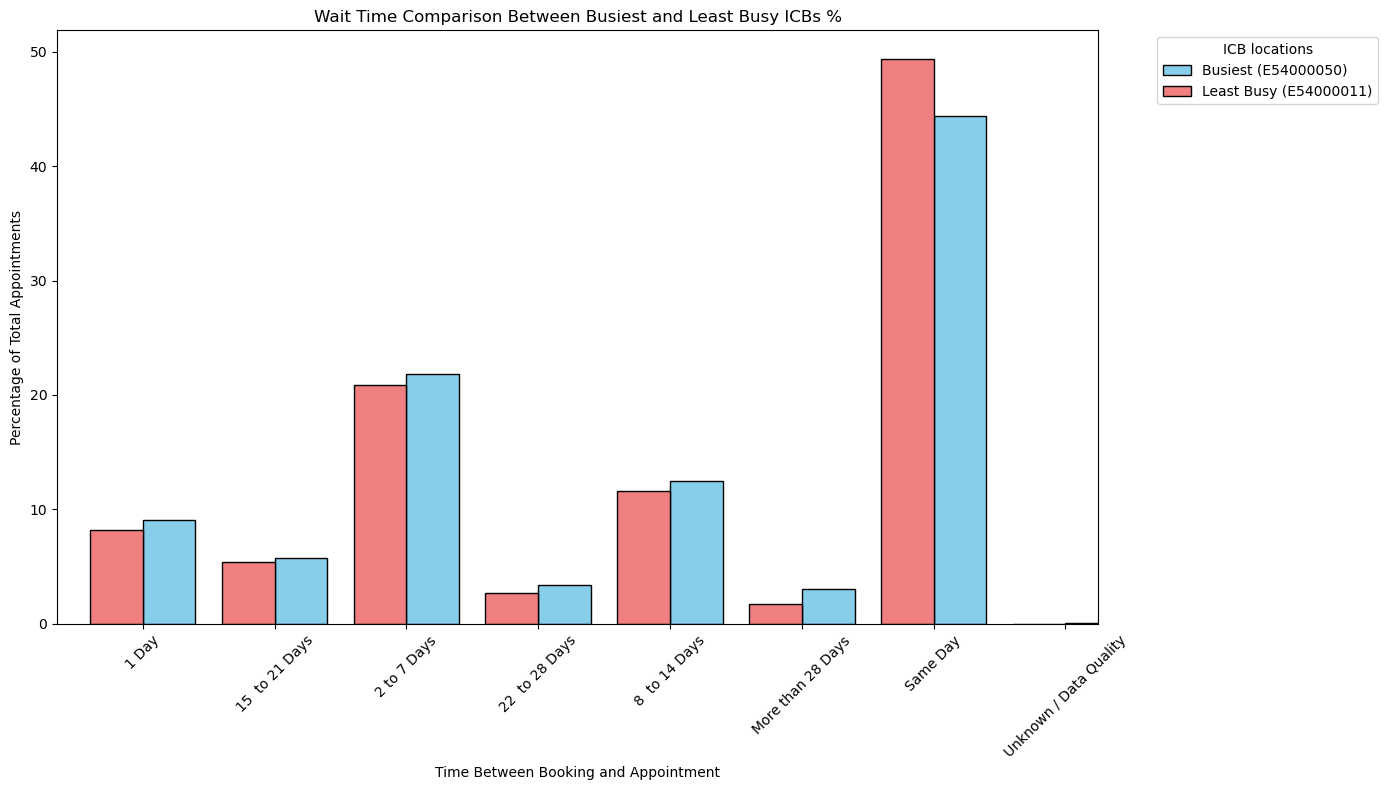

In [62]:
# Filter the DataFrame for the busiest and least busy ICB codes
filtered_ar_busiest = ar[ar['icb_ons_code'] == 'E54000050']
filtered_ar_least = ar[ar['icb_ons_code'] == 'E54000011']

# Group by 'time_between_book_and_appointment' and sum the number of appointments for each ICB code
appointments_by_wait_busiest = (
    filtered_ar_busiest.groupby('time_between_book_and_appointment')
    ['ar_count_of_appointments']
    .sum()
)
appointments_by_wait_least = (
    filtered_ar_least.groupby('time_between_book_and_appointment')
    ['ar_count_of_appointments']
    .sum()
)

# Normalize the data by dividing by the total appointments for each ICB, 
#and then multiply by 100 for percentage.
total_appointments_busiest = appointments_by_wait_busiest.sum()
total_appointments_least = appointments_by_wait_least.sum()

normalized_busiest = (appointments_by_wait_busiest / total_appointments_busiest) * 100
normalized_least = (appointments_by_wait_least / total_appointments_least) * 100

# Create a bar plot for the normalized count of appointments 
#by 'time_between_book_and_appointment' for both ICB codes.
plt.figure(figsize=(14, 8))

# Plot the busiest ICB code (E54000050) in skyblue.
normalized_busiest.plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='black', 
    position=0, 
    width=0.4, 
    label='Busiest (E54000050)'
)

# Plot the least busy ICB code (E54000011) in lightcoral.
normalized_least.plot(
    kind='bar', 
    color='lightcoral', 
    edgecolor='black', 
    position=1, 
    width=0.4, 
    label='Least Busy (E54000011)'
)

# Set plot title and labels
plt.title("Wait Time Comparison Between Busiest and Least Busy ICBs %")
plt.xlabel("Time Between Booking and Appointment")
plt.ylabel("Percentage of Total Appointments")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend 
plt.legend(
    title='ICB locations', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

# Display the plot
plt.tight_layout()
plt.show()


## Service Setting

**Observations** 91% of all appointments is delivered by GP practice staff. 

Plot lines for all settings replicate appointment peaks. 

However adjusted for General Practice to be removed, Unmapped category shows the most severe spike in appointment count. 


Average Monthly Appointments by Service Setting:
Extended Access Provision: 197,892
General Practice: 24,619,245
Other: 492,734
Primary Care Network: 596,126
Unmapped: 1,007,346

Proportions of Average Monthly Appointments by Service Setting (%):
Extended Access Provision: 1%
General Practice: 91%
Other: 2%
Primary Care Network: 2%
Unmapped: 4%


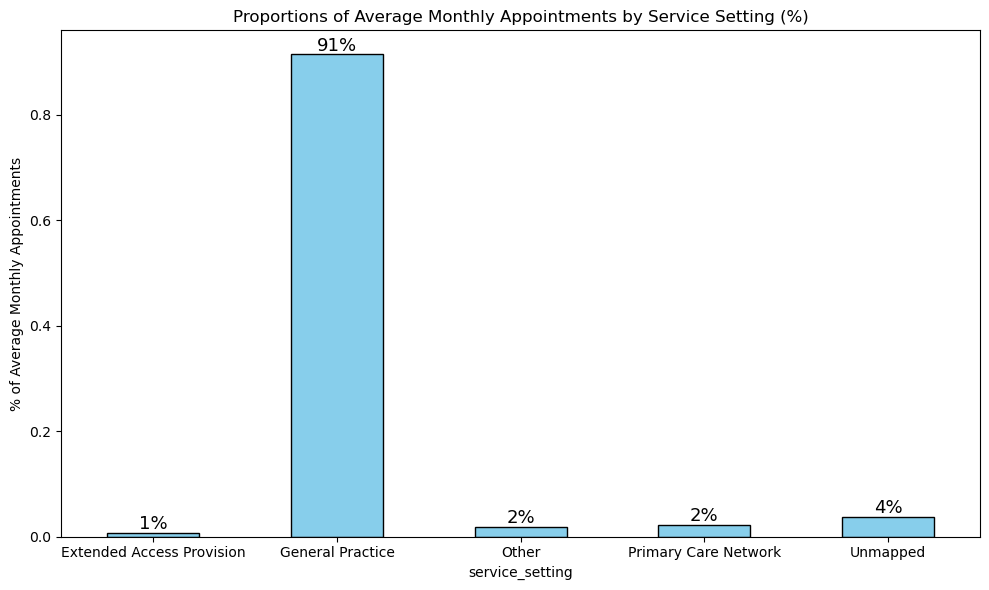

In [64]:
# The average monthly appointments split by 'service_setting' in 'nc' DataFrame.

# Group by 'service_setting' and calculate the sum of appointments for each setting.
appointments_by_service_set = (
    nc.groupby('service_setting')
    ['nc_count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate average monthly appointments per 'service_setting'.
appointments_by_service_set['average_monthly_appointments'] = (
    appointments_by_service_set['nc_count_of_appointments'] 
    / nc['appointment_month'].nunique()
)

# Print the average monthly appointments.
print("\nAverage Monthly Appointments by Service Setting:")
for _, row in appointments_by_service_set.iterrows():
    print(f"{row['service_setting']}: {row['average_monthly_appointments']:,.0f}")

# Calculate the overall average of appointments 
#(total sum of appointments divided by total number of months).
overall_average_of_appointments_nc = (
    nc['nc_count_of_appointments'].sum() 
    / nc['appointment_month'].nunique()
)

# Calculate the proportion of each 'service_setting' 
#to the total average monthly appointments.
appointments_by_service_set['proportion'] = (
    appointments_by_service_set['average_monthly_appointments'] 
    / overall_average_of_appointments_nc
)

# Print proportions of each service setting
print("\nProportions of Average Monthly Appointments by Service Setting (%):")
for _, row in appointments_by_service_set.iterrows():
    print(f"{row['service_setting']}: {row['proportion'] * 100:,.0f}%")

# Plot the proportions as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the proportions of appointments by service setting.
appointments_by_service_set.set_index('service_setting')['proportion'].plot(
    kind='bar', 
    ax=ax, 
    color='skyblue', 
    edgecolor='black'
)

# Add the percentage labels to each bar.
for i, value in enumerate(appointments_by_service_set['proportion']):
    ax.text(
        i, 
        value - 0.001, 
        f'{value * 100:,.0f}%', 
        ha='center', 
        va='bottom', 
        fontsize=13
    )

# Adding labels and title
ax.set_ylabel('% of Average Monthly Appointments')
ax.set_title('Proportions of Average Monthly Appointments by Service Setting (%)')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


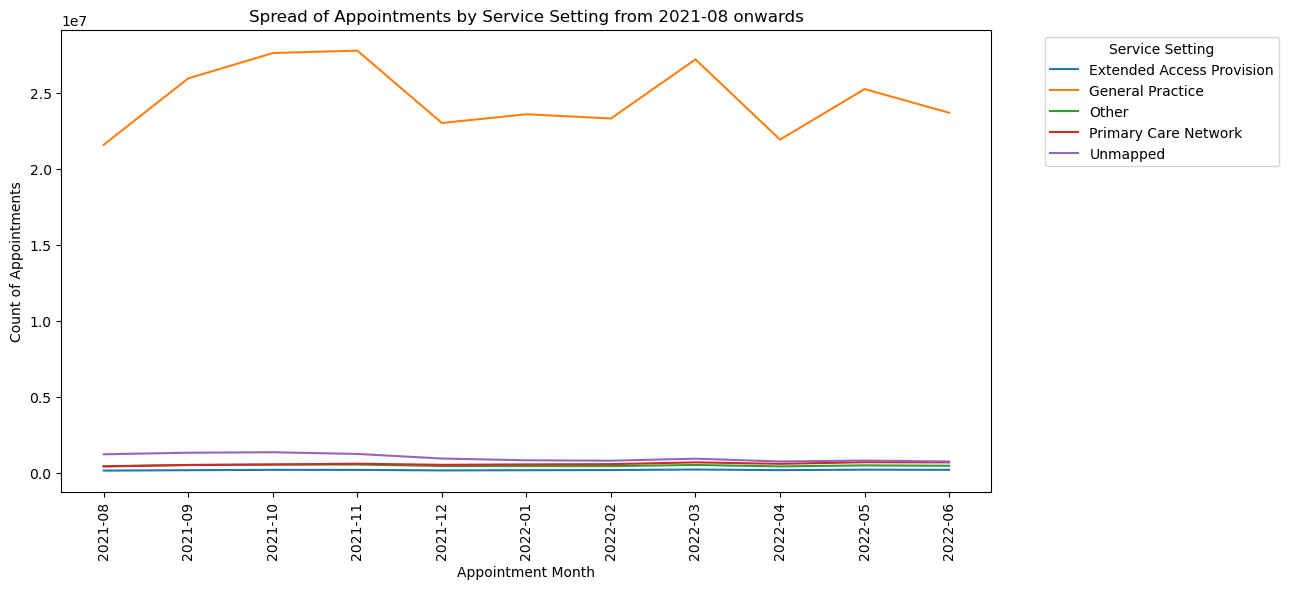

In [65]:
# Investigate Service Setting for months from 2021-08 onwards.
#Group by month and 'service_setting' and calculate the sum of 'nc_count_of_appointments'.
appt_by_service_setting = (
    nc.groupby(['appointment_month','service_setting'])
    ['nc_count_of_appointments']
    .sum()
    .reset_index()
)

# Create lineplot.
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='nc_count_of_appointments', 
    hue='service_setting', 
    data=appt_by_service_setting, 
    errorbar=None
)

# Move the legend outside of the plot
plt.legend(
    title='Service Setting', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

# Add labels and title
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.title('Spread of Appointments by Service Setting from 2021-08 onwards')

# Rotate x-axis labels 
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()



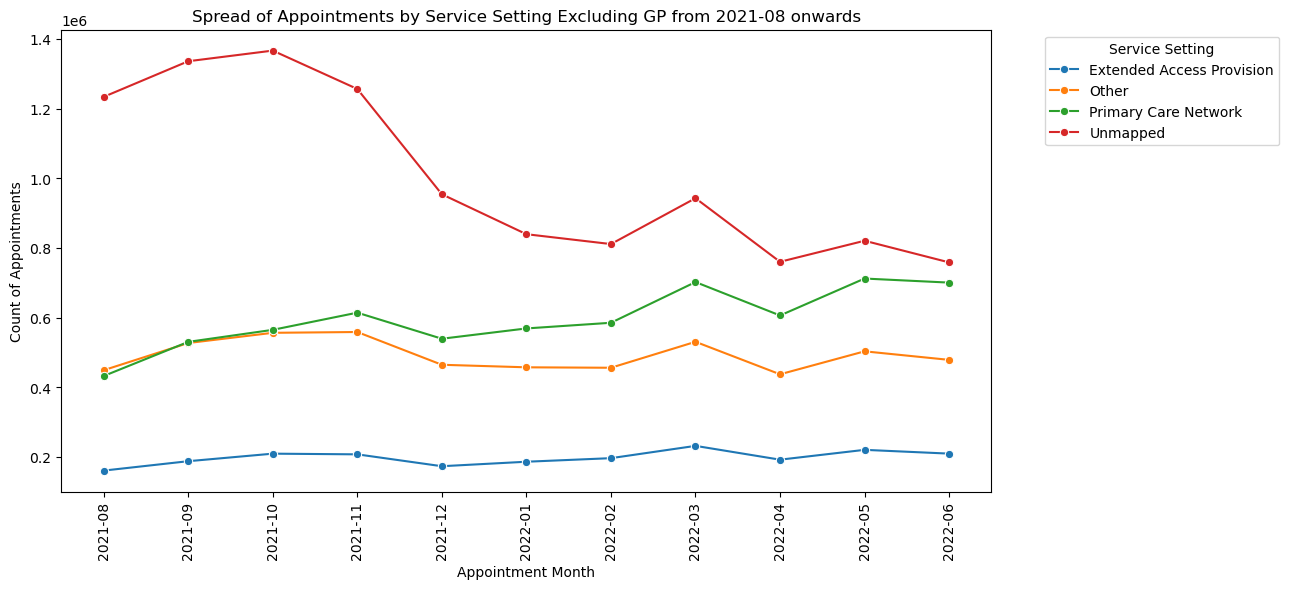

In [66]:
# Investigate Service Setting without 'General Practice' for months from 2021-08 onwards.
# Filter out 'General Practice' from the service_setting.
appt_by_service_setting_no_gp = nc[nc['service_setting'] != 'General Practice']

#Group by month and 'service_setting' and calculate the sum of 'nc_count_of_appointments'.
appt_by_service_setting_no_gp = (
    appt_by_service_setting_no_gp.groupby(['appointment_month','service_setting'])
    ['nc_count_of_appointments']
    .sum().
    reset_index()
)

# Create lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='nc_count_of_appointments', 
    hue='service_setting', 
    data=appt_by_service_setting_no_gp, 
    errorbar=None, marker='o'
)

# Move the legend outside of the plot
plt.legend(
    title='Service Setting',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Add labels and title
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.title('Spread of Appointments by Service Setting Excluding GP from 2021-08 onwards')

# Rotate x-axis labels 
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()


## Context Type and National Categories
**Observations** 87% of appointments are Care Related Encounter, 9% inconsistently mapped & 4% unmapped at all.

Within national categories General Consultation Routine 33% & Acute 18%, Clinical Triage - 14%, Planned Clinical Procedure and Planned Clinics 9% each.

During the autumn appointment peak, there is a notable rise in the Planned Clinical Procedure and Planned Clinics categories, which likely explains the overall surge in appointments across all ICBs during this period.



Average Monthly Appointments by Context Type:
Care Related Encounter: 23,370,469
Inconsistent Mapping: 2,535,527
Unmapped: 1,007,346

Proportions of Average Monthly Appointments by Context Type (%):
Care Related Encounter: 87%
Inconsistent Mapping: 9%
Unmapped: 4%


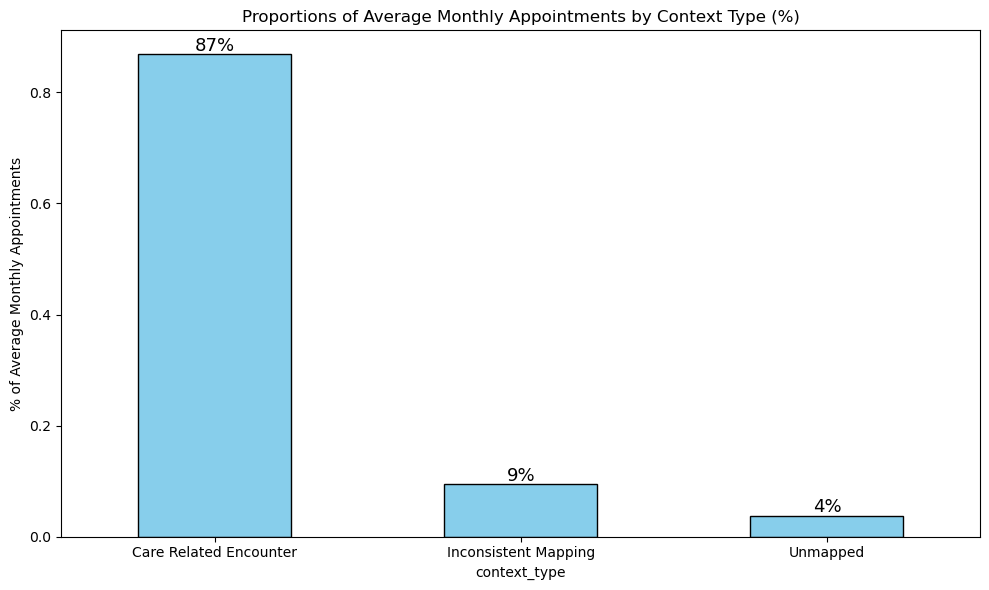

In [68]:
# Group by 'context_type' and calculate the sum of appointments for each context type.
appointments_by_context_type = (
    nc.groupby('context_type')
    ['nc_count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate the average monthly appointments per 'context_type'.
unique_months = nc['appointment_month'].nunique()
appointments_by_context_type['average_monthly_appointments'] = (
    appointments_by_context_type['nc_count_of_appointments'] 
    / unique_months
)

# Print the average monthly appointments.
print("\nAverage Monthly Appointments by Context Type:")
for _, row in appointments_by_context_type.iterrows():
    print(f"{row['context_type']}: {row['average_monthly_appointments']:,.0f}")

# Calculate the overall average of appointments 
#(total sum of appointments divided by total number of months).
overall_average_of_appointments_nc = nc['nc_count_of_appointments'].sum() / unique_months

# Calculate the proportion of each 'context_type' to the total average monthly appointments.
appointments_by_context_type['proportion'] = (
    appointments_by_context_type['average_monthly_appointments'] 
    / overall_average_of_appointments_nc
)

# Print proportions of each context type.
print("\nProportions of Average Monthly Appointments by Context Type (%):")
for _, row in appointments_by_context_type.iterrows():
    print(f"{row['context_type']}: {row['proportion'] * 100:,.0f}%")

# Plot the proportions as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

appointments_by_context_type.set_index('context_type')['proportion'].plot(
    kind='bar', 
    ax=ax, 
    color='skyblue', 
    edgecolor='black'
)

# Add the percentage labels to each bar.
for i, value in enumerate(appointments_by_context_type['proportion']):
    ax.text(
        i, 
        value - 0.001, 
        f'{value * 100:,.0f}%', 
        ha='center', 
        va='bottom', 
        fontsize=13
    )

# Adding labels and title
ax.set_ylabel('% of Average Monthly Appointments')
ax.set_title('Proportions of Average Monthly Appointments by Context Type (%)')

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Average Monthly Appointments by National Category:
Care Home Needs Assessment & Personalised Care and Support Planning: 36,900
Care Home Visit: 57,116
Clinical Triage: 3,776,997
General Consultation Acute: 4,881,014
General Consultation Routine: 8,842,866
Group Consultation and Group Education: 5,512
Home Visit: 194,950
Inconsistent Mapping: 2,535,527
Non-contractual chargeable work: 12,628
Patient contact during Care Home Round: 73,666
Planned Clinical Procedure: 2,336,609
Planned Clinics: 2,547,250
Service provided by organisation external to the practice: 77,467
Social Prescribing Service: 43,257
Structured Medication Review: 168,944
Unmapped: 1,007,346
Unplanned Clinical Activity: 277,799
Walk-in: 37,494

Proportions of Average Monthly Appointments by National Category (%):
Care Home Needs Assessment & Personalised Care and Support Planning: 0%
Care Home Visit: 0%
Clinical Triage: 14%
General Consultation Acute: 18%
General Consultation Routine: 33%
Group Consultation and Group Ed

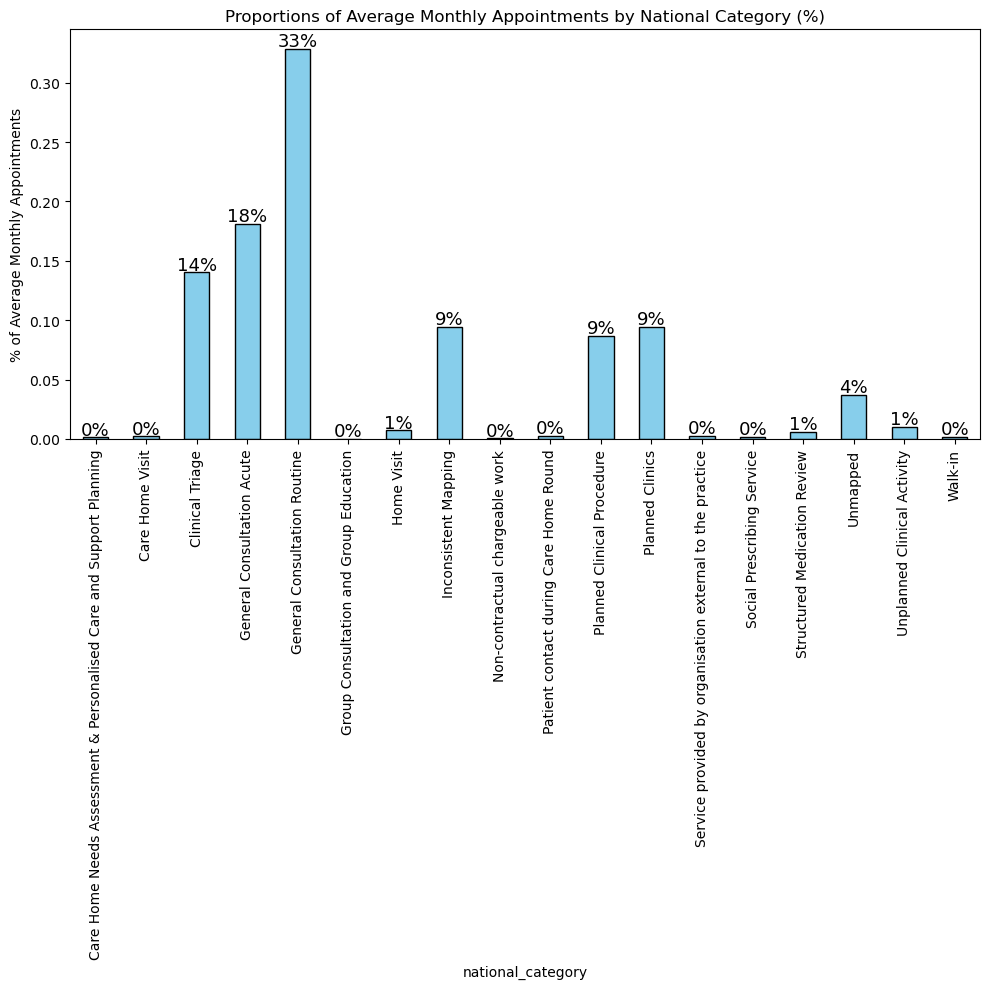

In [69]:
# The average monthly appointments split by 'national_category' in 'nc' DataFrame.

# Group by 'national_category' and calculate the sum of appointments for each category.
appointments_by_national_category = (
    nc.groupby('national_category')
    ['nc_count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate average monthly appointments per 'national_category'.
appointments_by_national_category['average_monthly_appointments'] = (
    appointments_by_national_category['nc_count_of_appointments'] 
    / nc['appointment_month'].nunique()
)

# Print the average monthly appointments.
print("\nAverage Monthly Appointments by National Category:")
for _, row in appointments_by_national_category.iterrows():
    print(f"{row['national_category']}: {row['average_monthly_appointments']:,.0f}")

# Calculate the overall average of appointments 
#(total sum of appointments divided by total number of months)
overall_average_of_appointments_nc = (
    nc['nc_count_of_appointments'].sum() 
    / nc['appointment_month'].nunique()
)

# Calculate the proportion of each 'national_category' to the total average monthly appointments.
appointments_by_national_category['proportion'] = (
    appointments_by_national_category['average_monthly_appointments'] 
    / overall_average_of_appointments_nc
)

# Print proportions of each national category.
print("\nProportions of Average Monthly Appointments by National Category (%):")
for _, row in appointments_by_national_category.iterrows():
    print(f"{row['national_category']}: {row['proportion'] * 100:,.0f}%")

# Plot the proportions as a bar chart.
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the proportions of appointments by national category.
appointments_by_national_category.set_index('national_category')['proportion'].plot(
    kind='bar', 
    ax=ax, 
    color='skyblue', 
    edgecolor='black'
)

# Add the percentage labels to each bar.
for i, value in enumerate(appointments_by_national_category['proportion']):
    ax.text(
        i, 
        value - 0.001, 
        f'{value * 100:,.0f}%', 
        ha='center', 
        va='bottom', 
        fontsize=13
    )

# Adding labels and title.
ax.set_ylabel('% of Average Monthly Appointments')
ax.set_title('Proportions of Average Monthly Appointments by National Category (%)')

# Display the plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


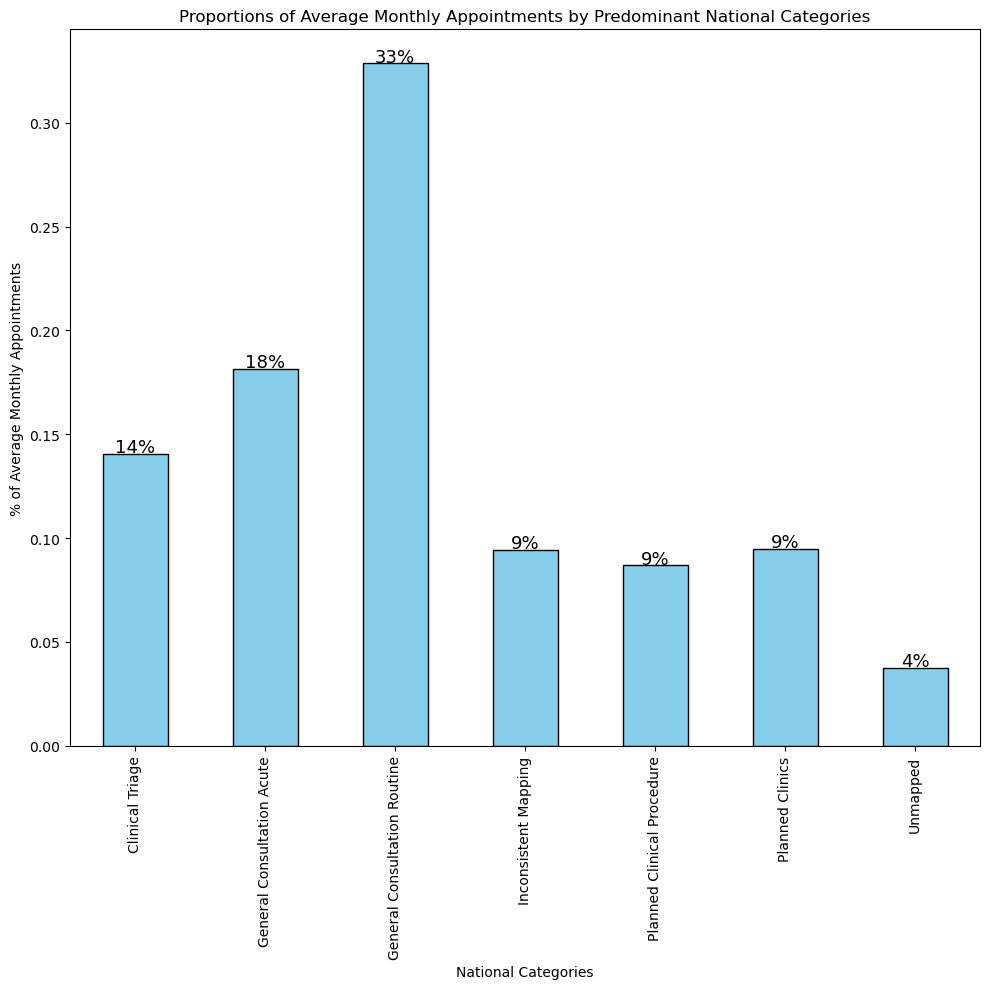

In [70]:
# Plot only prominent categories.
# Define the categories to display.
categories_to_display = ['Clinical Triage', 'General Consultation Acute', 'General Consultation Routine', 
                         'Inconsistent Mapping', 'Planned Clinical Procedure', 'Planned Clinics', 'Unmapped']

# Ensure 'national_category' is in the index, if not, set it as index for easy filtering.
appointments_by_national_category.reset_index(inplace=True)

# Filter the DataFrame to only include the specified national categories
filtered_proportions = (
    appointments_by_national_category[appointments_by_national_category['national_category']
    .isin(categories_to_display)]
)

# Check if the filtered DataFrame is empty
if filtered_proportions.empty:
    print("\nNo matching categories found in appointments_by_national_category!")
else:
    # Plot the standard bar chart with the filtered data
    fig, ax = plt.subplots(figsize=(10, 10))

    # Use 'proportion' column for the bars
    filtered_proportions.plot(
        kind='bar', 
        x='national_category', 
        y='proportion', 
        ax=ax, 
        color='skyblue', 
        edgecolor='black')

    # Remove legend
    ax.get_legend().set_visible(False)

    # Add the percentage labels to each bar
    for i, value in enumerate(filtered_proportions['proportion']):
        ax.text(
            i, 
            value - 0.001, 
            f'{value * 100:,.0f}%', 
            ha='center', 
            va='bottom', 
            fontsize=13
        )

    # Adding labels and title
    ax.set_ylabel('% of Average Monthly Appointments')
    ax.set_xlabel('National Categories')
    ax.set_title('Proportions of Average Monthly Appointments by Predominant National Categories')

    # Display the plot
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

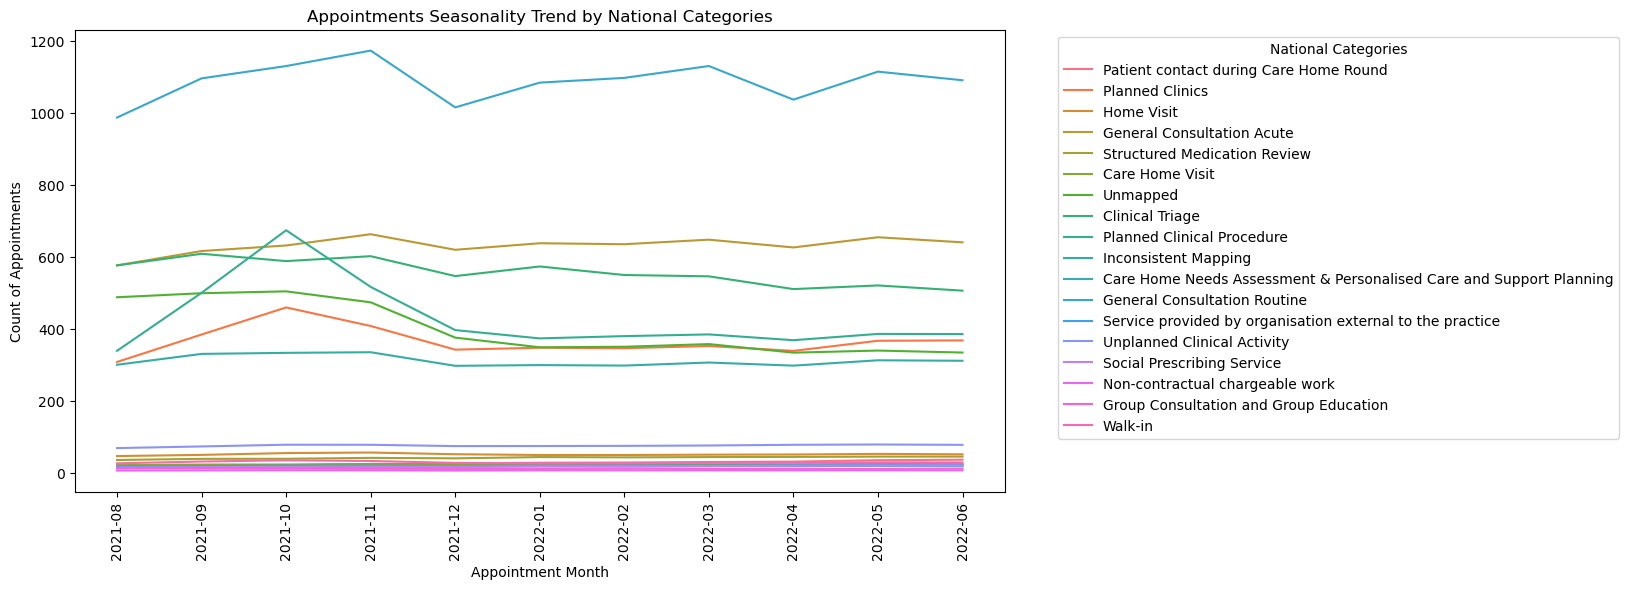

In [71]:
# Plot the appointments over the available date range to review the national categories for seasonality trend.
# Create a lineplot.
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='nc_count_of_appointments', 
    hue='national_category', 
    data=nc, 
    errorbar=None
)

# Move the legend outside of the plot
plt.legend(
    title='National Categories', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

# Add labels and title
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.title('Appointments Seasonality Trend by National Categories')

# Rotate x-axis labels 
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

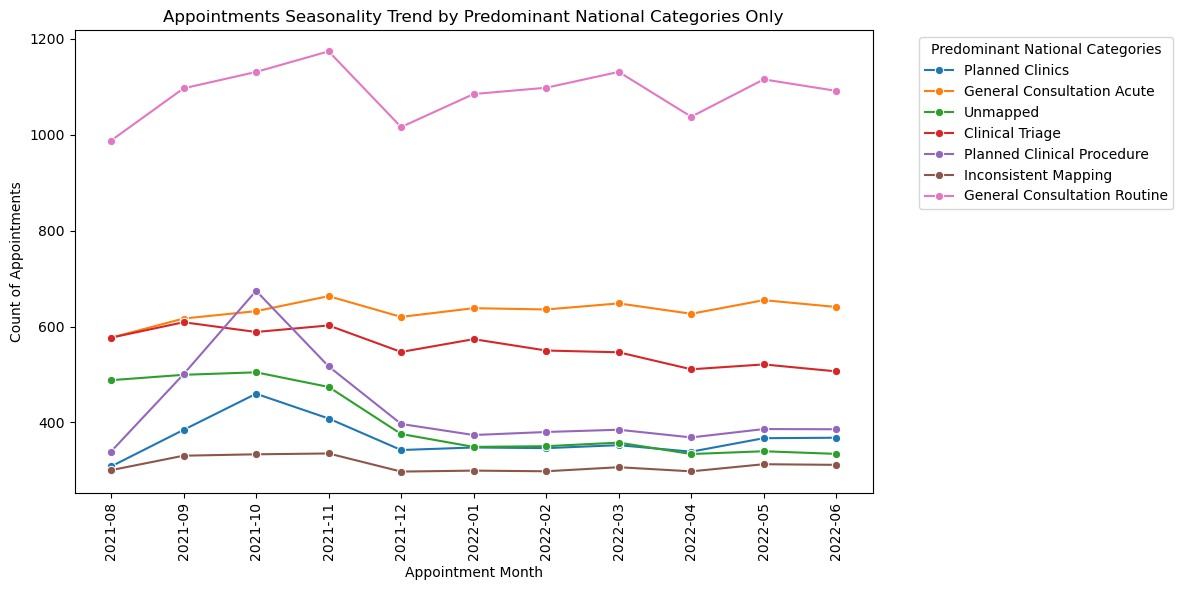

In [72]:
# Plot the appointments over the available time period for seasonality trend
# but only with prominent national categories.
# List of categories to be displayed
categories_to_display = ['Clinical Triage', 'General Consultation Acute', 'General Consultation Routine', 
                         'Inconsistent Mapping', 'Planned Clinical Procedure', 'Planned Clinics', 'Unmapped']

# Filter the DataFrame to only include the categories in categories_to_display.
filtered_nc = nc[nc['national_category'].isin(categories_to_display)]

# Create a lineplot using the filtered data.
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='appointment_month', 
    y='nc_count_of_appointments', 
    hue='national_category', 
    data=filtered_nc, 
    errorbar=None, 
    marker='o'
)

# Move the legend outside of the plot
plt.legend(
    title='Predominant National Categories', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

# Add labels and title
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.title('Appointments Seasonality Trend by Predominant National Categories Only')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## Actual_duration

**Observation:**
 Metric is very limited by its newness and data quality issues. Almost 40% of appointments is less than 10min   

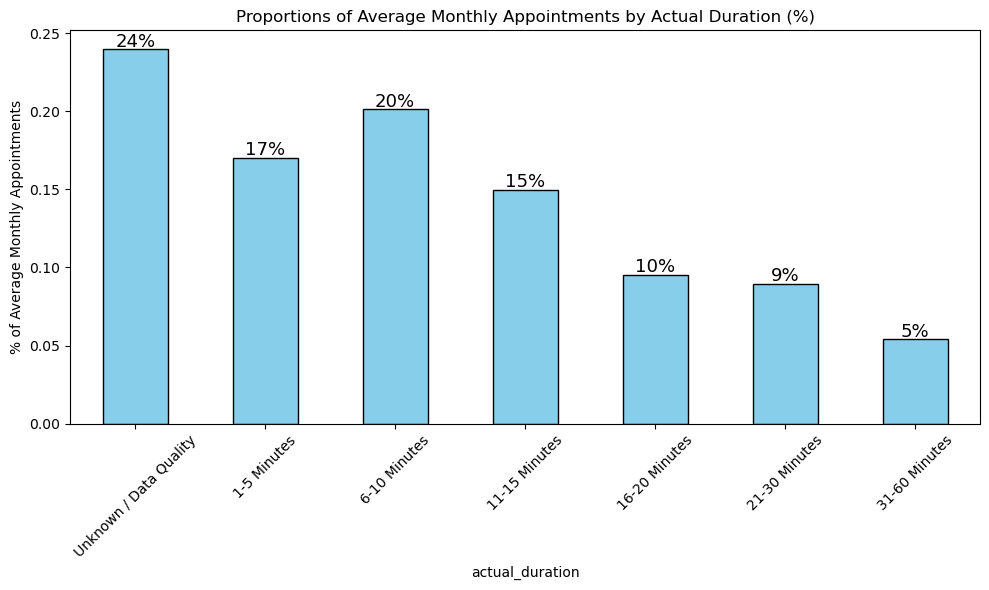

In [74]:
# Calculate % for actual_duration categories 
#and display on the plot in specific order.
# The list of categories in the desired order
duration_order = ['Unknown / Data Quality', '1-5 Minutes', '6-10 Minutes', '11-15 Minutes', 
                  '16-20 Minutes', '21-30 Minutes', '31-60 Minutes']

# Group by 'actual_duration' and calculate the sum of appointments for each duration.
appointments_by_actual_duration = (
    ad.groupby('actual_duration')
    ['ad_count_of_appointments']
    .sum()
    .reset_index()
)

# Calculate average monthly appointments per 'actual_duration'.
appointments_by_actual_duration['average_monthly_appointments'] = (
    appointments_by_actual_duration['ad_count_of_appointments'] 
    / ad['appointment_month'].nunique()
)

# Calculate overall average monthly appointments (sum across all actual durations).
overall_average_of_appointments_ad = (
    appointments_by_actual_duration['average_monthly_appointments']
    .sum()
)

# Proportion of each 'actual_duration' to the total average monthly appointments.
appointments_by_actual_duration['proportion'] = (
    appointments_by_actual_duration['average_monthly_appointments'] 
    / overall_average_of_appointments_ad
)

# Ensure the DataFrame is sorted by 'actual_duration' in the specified order.
appointments_by_actual_duration['actual_duration'] = pd.Categorical(
    appointments_by_actual_duration['actual_duration'], 
    categories=duration_order, 
    ordered=True
)

# Sort the DataFrame by the 'actual_duration' column according to the specified order.
appointments_by_actual_duration = (
    appointments_by_actual_duration.sort_values('actual_duration'))

# Plot the bar chart with the ordered 'actual_duration'
fig, ax = plt.subplots(figsize=(10, 6))

appointments_by_actual_duration.plot(
    kind='bar', 
    x='actual_duration', 
    y='proportion', 
    ax=ax, 
    color='skyblue', 
    edgecolor='black', 
    legend=False
)

# Add the percentage labels to each bar.
for i, value in enumerate(appointments_by_actual_duration['proportion']):
    ax.text(
        i, 
        value - 0.001, 
        f'{value * 100:,.0f}%', 
        ha='center', 
        va='bottom', 
        fontsize=13
    )

# Adding labels and title
ax.set_ylabel('% of Average Monthly Appointments')
ax.set_title('Proportions of Average Monthly Appointments by Actual Duration (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid overlap & show plot
plt.tight_layout()
plt.show()

## Monthly Capacity Utilisation if Max Capasity for Guideline Average of 1,200,000 appointments per day
**Observation:**
Total Monthly Appointments Plot shows the number of appointments made each month.
Monthly Capacity Utilisation Plot shows how much of the available capacity was utilized each month subject to given number of 1.2 million appointments per day.
**System is between 70-85% of capacity**

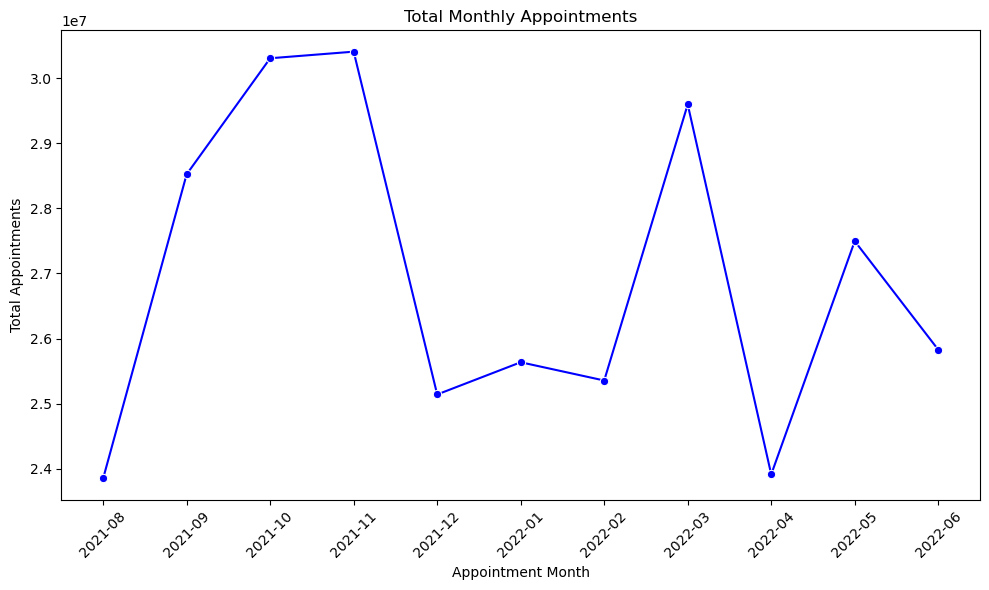

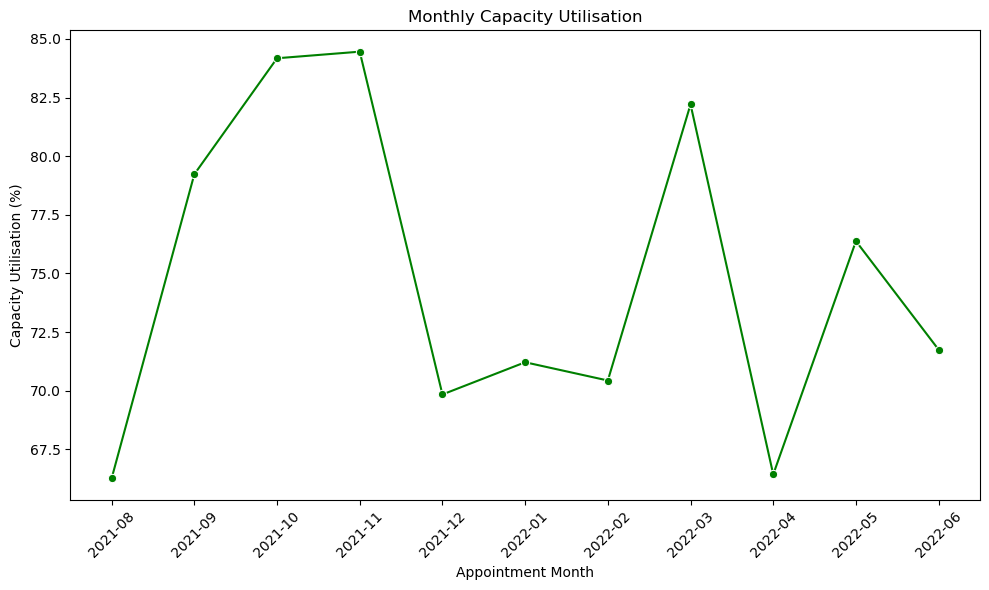

In [76]:
# Create an aggregated data set to review the different features.
ar_agg = filtered_ar[['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'ar_count_of_appointments']]

# View the DataFrame.
#ar_agg.tail()

# Determine the total number of appointments per month.
ar_df = (
    ar_agg.groupby('appointment_month')
    ['ar_count_of_appointments']
    .sum()
    .reset_index()
)
#ar_df.head()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a average daily value.
ar_df_u = ar_df.copy()
ar_df_u['avg_daily_appt'] = ar_df_u['ar_count_of_appointments'] / 30 
# Round the 'utilisation' column values
ar_df_u['avg_daily_appt'] = ar_df_u['avg_daily_appt'].round(1)

# View the updated DataFrame
#ar_df_u

# Plot sum of count of monthly visits.
# Change 'appointment_month' to string in  ar_df
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Given capacity information 1,200,000 appointments per day for 30 days in a month
monthly_capacity = 1200000 * 30  

# Calculate capacity utilisation for each month
ar_df_u['capacity_utilisation'] = (
    ar_df_u['ar_count_of_appointments'] 
    / monthly_capacity
) * 100

# Plot the total monthly appointments
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='appointment_month', 
    y='ar_count_of_appointments', 
    data=ar_df_u,
    marker='o', 
    color='b'
)
plt.title('Total Monthly Appointments')
plt.xlabel('Appointment Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the monthly capacity utilisation
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='appointment_month', 
    y='capacity_utilisation', 
    data=ar_df_u, 
    marker='o', 
    color='g'
)
plt.title('Monthly Capacity Utilisation')
plt.xlabel('Appointment Month')
plt.ylabel('Capacity Utilisation (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## The Rest

In [78]:
# Find busiest locations in terms of appointments. UPD in London & SE England
#Groups by location name counts total of appointments.
appt_num_by_location_name = nc.groupby(['sub_icb_location_name'])['nc_count_of_appointments'].sum()

#Sort by the count of appointments in descending order
sorted_appt_num_by_location_name = appt_num_by_location_name.sort_values(ascending=False)

sorted_appt_num_by_location_name.head()

sub_icb_location_name
NHS North West London ICB - W2U3Z              12142390
NHS North East London ICB - A3A8R               9588891
NHS Kent and Medway ICB - 91Q                   9286167
NHS Hampshire and Isle Of Wight ICB - D9Y0V     8288102
NHS South East London ICB - 72Q                 7850170
Name: nc_count_of_appointments, dtype: int64

### Twitter related
**Observation** Twitter dataset is generic and unrelated to the scope of the analysis, and therefore, does not contribute meaningfully to the findings.

In [80]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# Explore the metadata and data set.
print(tweets.info())
print(tweets.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None
           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std

In [81]:
# Assuming retweeted and favourite tweet messages are of value.
tweets['tweet_retweet_count'].value_counts()
tweets['tweet_favorite_count'].value_counts()

tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64

In [82]:
# Create a new DataFrame containing only relevant columns that hold hashtags. 
tweets_text = pd.DataFrame({
    'tweet_id': tweets['tweet_id'],
    'tweet_full_text': tweets['tweet_full_text'],
    'tweet_entities_hashtags': tweets['tweet_entities_hashtags']
})
tweets_text.info()
tweets_text.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities_hashtags  1007 non-null   object
dtypes: int64(1), object(2)
memory usage: 27.6+ KB


,tweet_id,tweet_full_text,tweet_entities_hashtags
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,#Healthcare
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"#PremiseHealth, #hiring"
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,#Healthcare
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,#NEW
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"#blogs, #digitaltransformation, #cybersecurity..."


In [83]:
# Change tweet_id and tweet_entities_hashtags columns type to string.
tweets['tweet_id'] = tweets['tweet_id'].astype(str)

tweets_text['tweet_entities_hashtags'] = tweets_text['tweet_entities_hashtags'].astype(str)

In [84]:
# Create new DataFrame to house only hashtags and it's unique counts
# Create an empty list for tags.
tags = []

#Iterate over the tweet_full_text and extract hashtags
for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())

#Create a Pandas Series to count the occurrences of each hashtag
tags_series = pd.Series(tags)

#Display the first 30 records
print(tags_series.value_counts().head(30))

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [85]:
# Create variable that counts the occurrences of each unique hashtag.
hashtag_counts = tags_series.value_counts()

# Convert the hashtag counts series to a DataFrame.
data = pd.DataFrame(hashtag_counts).reset_index()

# Rename the columns.
data.columns = ['hashtag', 'count']
print(data.head(15)) 

                     hashtag  count
0                #healthcare    716
1                    #health     80
2                  #medicine     41
3                        #ai     40
4                       #job     38
5                   #medical     35
6                  #strategy     30
7            #pharmaceutical     28
8             #digitalhealth     25
9                    #pharma     25
10                #marketing     25
11               #medtwitter     24
12                  #biotech     24
13  #competitiveintelligence     24
14                    #meded     23


In [86]:
# Display records where the count is larger than 10.
filtered_data = data[data['count'] > 10]
print(filtered_data)

                        hashtag  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #we

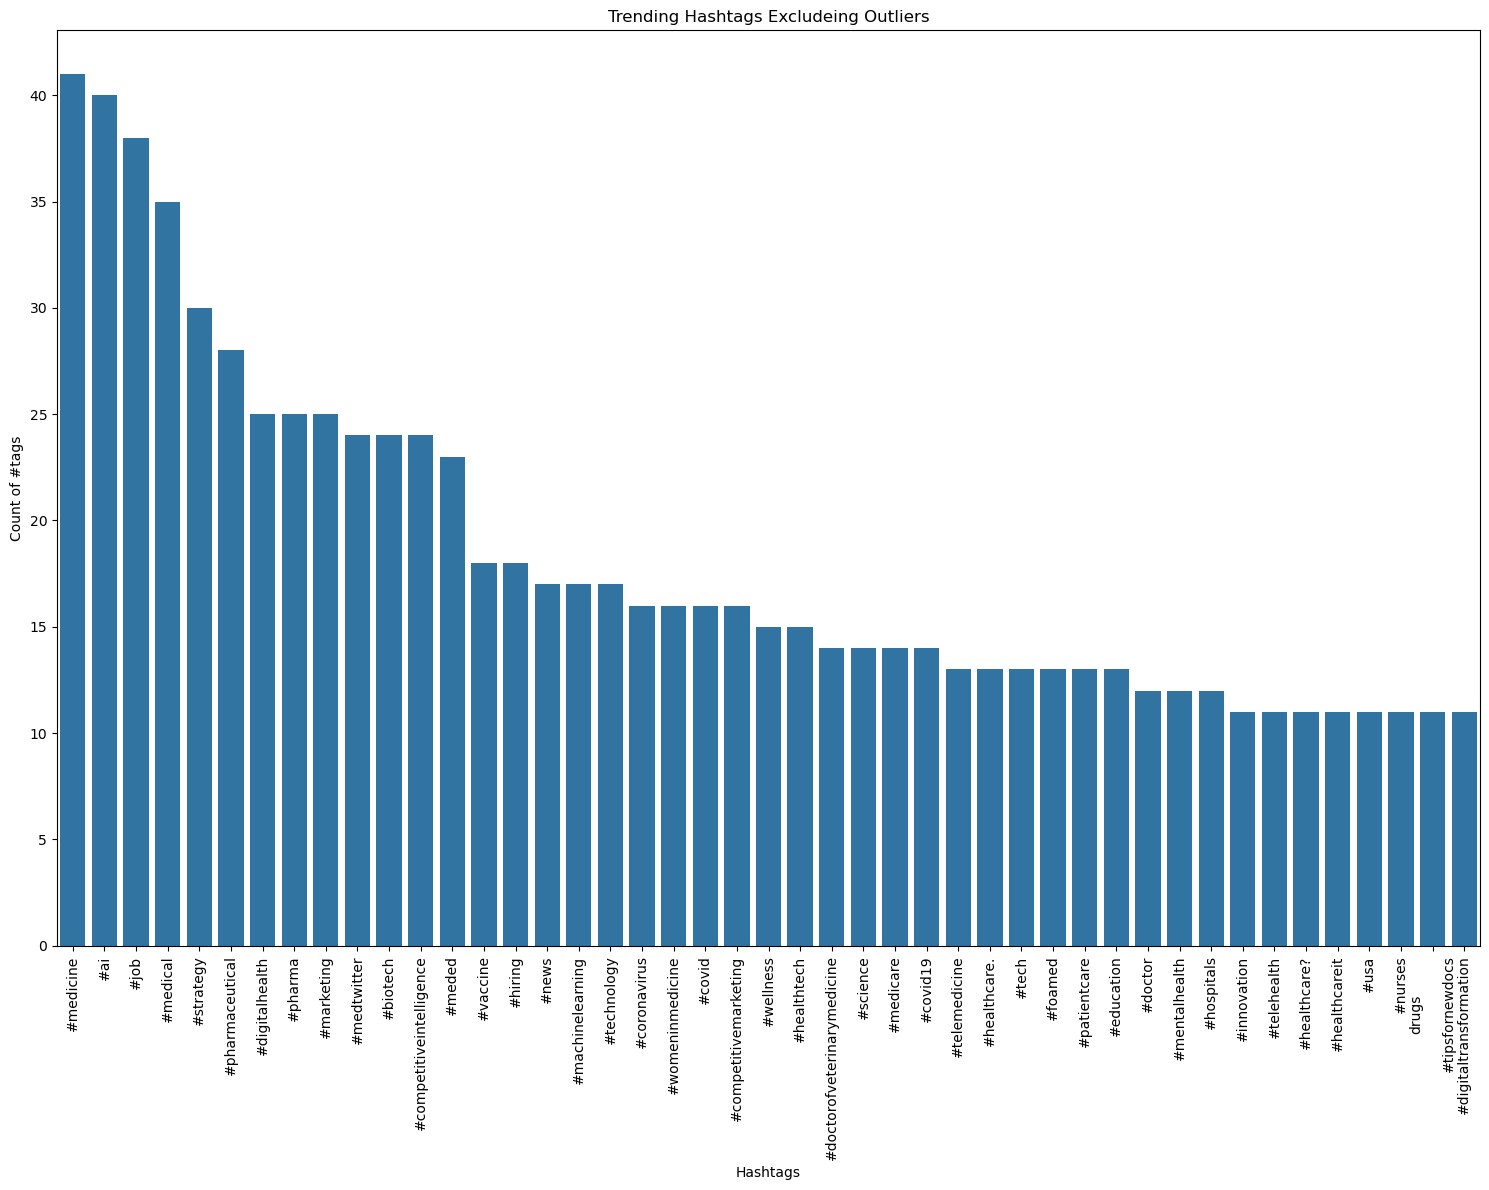

In [87]:
# There are couple of overrepresented #, hence create barplot displaying records with a count > 10 but <50
filtered_data = data[(data['count'] > 10) & (data['count'] <50 ) ]

fig, ax = plt.subplots(figsize=(15, 12))

sns.barplot(data=filtered_data, x='hashtag', y='count')

# Add labels and title
ax.set_xlabel('Hashtags')
ax.set_ylabel('Count of #tags')
ax.set_title('Trending Hashtags Excludeing Outliers')

# Rotate xticks
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()